# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>


## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


# 1.1 Reading Data

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from nltk.stem.porter import PorterStemmer
from sklearn.neighbors import KNeighborsClassifier
##from sklearn import cross_validation
from sklearn.metrics import roc_auc_score
##from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
## os.chdir('C:/Users/kingsubham27091995/Desktop/AppliedAiCouse/DonorsChoose')
import time
from scipy.sparse import hstack

In [2]:
project_data = pd.read_csv('c:\\train_data.csv',nrows = 20000)
resource_data = pd.read_csv('c:\\resources.csv')

In [3]:
print("Number of points in train data", project_data.shape)
print('_ '*35)
print("The attribute Names",project_data.columns.values)
#project_data.head(20)

Number of points in train data (20000, 17)
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
The attribute Names ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of points in resource data :", resource_data.shape)
print("attributes in resource data :", resource_data.columns.values)
resource_data.head(2)

Number of points in resource data : (1541272, 4)
attributes in resource data : ['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [5]:
def preprocessing_catogories(Datafile,AttributeName,ReplaceName):
    categories = list(Datafile[AttributeName].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
    cat_list = []
    for CurrentRow in tqdm(categories):
        temp = ""
        # consider we have text like this "Math & Science, Warmth, Care & Hunger"
        for word in CurrentRow.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
            if 'The' in word.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
                word=word.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
            word = word.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
            temp+=word.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
            temp = temp.replace('&','_') # we are replacing the & value into 
        cat_list.append(temp.strip())

    # Appending Cleaned Attribute list and removing the old attribute
    Datafile[ReplaceName]=cat_list
    Datafile.drop([AttributeName],axis=1,inplace=True)
    
    
    # counting the categories and sorting newly created list 
    my_counter = Counter()
    for word in tqdm(Datafile[ReplaceName].values):
        my_counter.update(word.split())
    
    cat_list = dict(my_counter)
    sorted_result = dict(sorted(cat_list.items(),key=lambda kv:kv[1]))
    return  sorted_result
 
    

In [6]:
# https://stackoverflow.com/a/47091490/4084039
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    
    # \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
    
    phrase = phrase.replace('\\r', ' ')
    phrase = phrase.replace('\\"', ' ')
    phrase = phrase.replace('\\n', ' ')
    
    #remove spacial character: https://stackoverflow.com/a/5843547/4084039
    phrase = re.sub('[^A-Za-z0-9]+', ' ', phrase)
    phrase = re.sub('nannan','', phrase)
    return phrase.strip()

In [7]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [8]:
def preprocessing_text(data):
    # Combining all the above statemennts 
    preprocessed_essays = []
    # tqdm is for printing the status bar
    for sentance in tqdm(data.values):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        sent = re.sub('nannan','', sent)
    # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e not in stopwords)
        preprocessed_essays.append(sent.lower().strip())
    return preprocessed_essays

### Preprocessing project_grade_categories

In [9]:
data = project_data['project_grade_category']
project_data.drop(['project_grade_category'],axis=1,inplace=True)

In [10]:
project_grade_category = []
for ele in data:
    project_grade_category.append(ele.replace(" ","_"))
project_grade_category[0:5]

['Grades_PreK-2', 'Grades_6-8', 'Grades_6-8', 'Grades_PreK-2', 'Grades_PreK-2']

In [11]:
project_data['project_grade_category']=project_grade_category
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime         project_subject_categories  \
0           IN        2016-12-05 13:43:57                Literacy & Language   
1           FL        2016-10-25 09:22:10  History & Civics, Health & Sports   

      project_subject_subcategories  \
0                     ESL, Literacy   
1  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

  project_grade_category  
0          Grades_PreK-2  
1             Grades_6-8

### Preprocessing project_subject_categories

In [12]:
sorted_cat_dict = preprocessing_catogories(project_data,'project_subject_categories','clean_categories')
project_data.head(2)

100%|████████████████████████████████████████████████████████████████████████| 20000/20000 [00:00<00:00, 371369.60it/s]


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime     project_subject_subcategories  \
0           IN        2016-12-05 13:43:57                     ESL, Literacy   
1           FL        2016-10-25 09:22:10  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

  project_grade_category              clean_categories  
0          Grades_PreK-2             Literacy_Language  
1             Grades_6-8  History_Civics Health_Sports

### Preprocessing project_subject_subcategories

In [13]:
sorted_sub_cat_dict = preprocessing_catogories(project_data,'project_subject_subcategories','clean_subcategories')
project_data.head(2)

100%|████████████████████████████████████████████████████████████████████████| 20000/20000 [00:00<00:00, 364620.63it/s]


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

  project_grade_category              clean_categories  \
0          Grades_PreK-2             Literacy_Language   
1             Grades_6-8  History_Civics Health_Sports   

            clean_subcategories  
0                  ESL Literacy  
1  Civics_Government TeamSports

## Text Preprocessing

### Finding number of words in title and appending it to new column
   - This can be used as Numerical Feature for Vectorisation

In [14]:
title_word_count = []
for word in project_data['project_title']:
    title_word_count.append(len(word.split()))

In [15]:
project_data["title_word_count"] = title_word_count
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

  project_grade_category              clean_categories  \
0          Grades_PreK-2             Literacy_Language   
1             Grades_6-8  History_Civics Health_Sports   

            clean_subcategories  title_word_count  
0                  ESL Literacy                 7  
1  Civics_Government TeamSports                 5

In [16]:
# merge two column text dataframe: 
project_data["Essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [17]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

  project_grade_category              clean_categories  \
0          Grades_PreK-2             Literacy_Language   
1             Grades_6-8  History_Civics Health_Sports   

            clean_subcategories  title_word_count  \
0                  ESL Literacy                 7   
1  Civics_Government TeamSports                 5   

                                               Essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

### Preprocessing Essay in project_data

In [18]:
preprocessed_essay=preprocessing_text(project_data['Essay'])

100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:11<00:00, 1688.11it/s]


In [19]:
# after preprocesing
project_data["clean_essays"] = preprocessed_essay
preprocessed_essay[5000]

'my class made students various grade levels we work hard filling learning gaps students reach grade level my students dealing emotional issues make hard handle frustration tasks need lot individual attention by learning work independently students chance mainstream classrooms peer groups our biggest goal students learn not control emotions learn students many spent large amount time absent school different reasons need get routine class task day modeling good classroom routines task important master move back general education classrooms being apart title 1 school means resources students need massive lot supplies shared parents make sure homework completed bouncy bands give students way get rid anxiety tension energy staying desk working independently students use bands either desk whole group table chair avoid get asked stop moving movement key keeping students adhd disabilities focused finishing assignments staying task teacher teaching my goal help students learn helpful strategie

In [20]:
project_data.drop(['Essay'], axis=1, inplace=True)

In [21]:
preprocessed_titles=preprocessing_text(project_data['project_title'])

100%|█████████████████████████████████████████████████████████████████████████| 20000/20000 [00:00<00:00, 36876.91it/s]


### Finding number of words in the essay and added in as a new column

In [22]:
essay_word_count = []
for words in project_data['clean_essays']:
    essay_word_count.append(len(words.split()))

In [23]:
project_data["essay_word_count"] = essay_word_count
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

  project_grade_category              clean_categories  \
0          Grades_PreK-2             Literacy_Language   
1             Grades_6-8  History_Civics Health_Sports   

            clean_subcategories  title_word_count  \
0                  ESL Literacy                 7   
1  Civics_Government TeamSports                 5   

                                        clean_essays  essay_word_count  
0  my students english learners working english s...               160  
1  our students arrive school eager learn they po...               108

### Calculating Sentiment Scores for the Essay Feature

In [24]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [25]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\keert\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [26]:
analyser = SentimentIntensityAnalyzer()

In [27]:
## http://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html
neg = []
pos = []
neu = []
compound = []

for words in tqdm(project_data["clean_essays"]) :
    Negative = analyser.polarity_scores(words)['neg']
    Positive = analyser.polarity_scores(words)['pos']
    Neutral = analyser.polarity_scores(words)['neu']
    Compound = analyser.polarity_scores(words)['compound']
    neg.append(Negative)
    pos.append(Positive)
    neu.append(Neutral)
    compound.append(Compound)

100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [02:14<00:00, 149.19it/s]


In [28]:
project_data["pos"] = pos
project_data["neg"] = neg
project_data["neu"] = neu
project_data["compound"] = compound

project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

     ...    project_grade_category              clean_categories  \
0    ...             Grades_PreK-2             Literacy_Language   
1    ...                Grades_6-8  History_Civics Health_Sports   

            clean_subcategories  title_word_count  \
0                  ESL Literacy                 7   
1  Civics_Government TeamSports                 5   

                                        clean_essays essay_word_count    pos  \
0  my students english learners working english s...              160  0.144   
1  our students arrive school eager learn they po...              108  0.285   

     neg    neu  compound  
0  0.012  0.843    0.9694  
1  0.049  0.667    0.9856  

[2 rows x 24 columns]

## 1.4 Preparing data for models

In [29]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'project_grade_category', 'clean_categories', 'clean_subcategories',
       'title_word_count', 'clean_essays', 'essay_word_count', 'pos', 'neg',
       'neu', 'compound'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data
       
       - quantity : numerical
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.4.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

### One Hot Encoding for categories

In [30]:
# we use count vectorizer to convert the values into one hot encoded features
def vec_cat_data_OneHot(DataFile,AttributeName,sorted_dict,Train):
    vectorizer = CountVectorizer(vocabulary=list(sorted_dict.keys()), lowercase=False, binary=True)
    
    if  Train:
        vectorizer.fit_transform(DataFile[AttributeName].values)
        print(vectorizer.get_feature_names())
    else:
        vectorizer.transform(DataFile[AttributeName].values)
        print(vectorizer.get_feature_names())
 
    AttributeNames=vectorizer.get_feature_names()
    
    result = vectorizer.transform(DataFile[AttributeName].values)
    print("Shape of matrix after one hot encodig ",result.shape)
    return result, AttributeNames

### One Hot Encoding for clean_categories

In [31]:
categories_one_hot ,ArNa_clean_categories = vec_cat_data_OneHot(project_data,'clean_categories',sorted_cat_dict,Train=True)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (20000, 9)


### One Hot Encoding for sub categories

In [32]:
sub_categories_one_hot, ArNa_clean_subcategories = vec_cat_data_OneHot(project_data,'clean_subcategories',sorted_sub_cat_dict,Train=True)


['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'College_CareerPrep', 'Other', 'Music', 'History_Geography', 'Health_LifeScience', 'ESL', 'EarlyDevelopment', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (20000, 30)


### Performing One Hot Encoding for school_state

In [33]:
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())


In [34]:
school_state_dict = dict(my_counter)
sorted_school_state_dict = dict(sorted(school_state_dict.items(),key=lambda kv:kv[1]))

### Performing One Hot Encoding for school_state

In [35]:
school_state_categories_one_hot, ArNa_school_state = vec_cat_data_OneHot(project_data,'school_state',sorted_school_state_dict,Train= True)

['VT', 'WY', 'ND', 'MT', 'NH', 'RI', 'DE', 'NE', 'SD', 'AK', 'NM', 'WV', 'HI', 'ME', 'DC', 'IA', 'ID', 'KS', 'AR', 'MN', 'MS', 'CO', 'KY', 'OR', 'MD', 'NV', 'AL', 'UT', 'TN', 'WI', 'CT', 'VA', 'NJ', 'AZ', 'MA', 'OK', 'WA', 'LA', 'MO', 'IN', 'OH', 'PA', 'MI', 'GA', 'SC', 'IL', 'NC', 'FL', 'TX', 'NY', 'CA']
Shape of matrix after one hot encodig  (20000, 51)


### Performing One Hot Encoding for project_grade_category

In [36]:
my_counter = Counter()
for word in project_data['project_grade_category'].values:
    my_counter.update(word.split())

In [37]:
project_grade_category_dict = dict(my_counter)
sorted_project_grade_category_dict = dict(sorted(project_grade_category_dict.items(),key=lambda kv:kv[1]))

### Performing One Hot Encoding for Project_Grade_Category

In [38]:
project_grade_categories_One_Hot, ArNa_project_grade_category = vec_cat_data_OneHot(project_data,'project_grade_category',sorted_project_grade_category_dict,Train= True)

['Grades_9-12', 'Grades_6-8', 'Grades_3-5', 'Grades_PreK-2']
Shape of matrix after one hot encodig  (20000, 4)


### Performing One Hot Encoding for teacher_prefix

In [39]:
data = project_data['teacher_prefix']
project_data.drop(['teacher_prefix'],axis=1,inplace=True)

In [40]:
teacher_prefix = []
for ele in data:
    temp = re.search(r'[a-zA-Z]+',str(ele)).group()
    temp = temp.replace("Teacher","Mrs")
    if pd.isnull(ele):
        temp = temp.replace("nan","Mrs")
    teacher_prefix.append(temp)


In [41]:
project_data['teacher_prefix']=teacher_prefix
project_data.head(2)

Unnamed: 0       id                        teacher_id school_state  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           IN   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a           FL   

  project_submitted_datetime  \
0        2016-12-05 13:43:57   
1        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4       ...                    clean_categories  \
0             NaN       ...                   Literacy_Language   
1             NaN       ...        History_Civics Health_Sports   

            clean_subcategories  title_word_count  \
0                  ESL Literacy                 7   
1  Civics_Government TeamSports                 5   

                                        clean_essays essay_word_count    pos  \
0  my students english learners working english s...              160  0.144   
1  our students arrive school eager learn they po...              108  0.285   

     neg    neu  compound  teacher_prefix  
0  0.012  0.843    0.9694             Mrs  
1  0.049  0.667    0.9856              Mr  

[2 rows x 24 columns]

In [42]:
my_counter = Counter()
for word in project_data['teacher_prefix'].values:
    my_counter.update(str(word).split())

In [43]:
teacher_prefix_dict = dict(my_counter)
sorted_teacher_prefix_dict = dict(sorted(teacher_prefix_dict.items(),key=lambda kv:kv[1]))

In [44]:
## ValueError: np.nan is an invalid document, expected byte or unicode string.
## The link below explains h0w to tackle such discrepancies.
## https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document/39308809#39308809

vectorizer = CountVectorizer(vocabulary=list(sorted_teacher_prefix_dict.keys()), lowercase=False, binary=True)

teacher_prefix_categories_one_hot = vectorizer.fit_transform(project_data['teacher_prefix'].values.astype("U"))

print(vectorizer.get_feature_names())

ArNa_teacher_prefix_categories = vectorizer.get_feature_names()

print("Shape of matrix after one hot encoding ",teacher_prefix_categories_one_hot.shape)


['Mr', 'Ms', 'Mrs']
Shape of matrix after one hot encoding  (20000, 3)


### Vectorizing Text data

### Bag of words on preprocessed_essay

In [45]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow_train = vectorizer.fit_transform(project_data["clean_essays"])

#print(vectorizer.get_feature_names())
ArNa_essay=vectorizer.get_feature_names()

print("Shape of matrix after one hot encodig ",text_bow_train.shape)


Shape of matrix after one hot encodig  (20000, 8463)


###  Bag of words on project_title

In [46]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
title_bow_train = vectorizer.fit_transform(project_data['project_title'])

ArNa_project_title=vectorizer.get_feature_names()

print("Shape of matrix after one hot encodig ",title_bow_train.shape)


Shape of matrix after one hot encodig  (20000, 1116)


### TFIDF vectorizer on preprocessed_essay

In [47]:
vectorizer = CountVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(project_data["clean_essays"])

ArNa_tfidf_essay=vectorizer.get_feature_names()

print("Shape of matrix after one hot encoding ",text_tfidf.shape)


Shape of matrix after one hot encoding  (20000, 8463)


### TFIDF vectorizer on project title

In [48]:
vectorizer = CountVectorizer(min_df=10)
title_tfidf = vectorizer.fit_transform(project_data['project_title'])

ArNa_tfidf_project_title=vectorizer.get_feature_names()

print("Shape of matrix after one hot encoding  ",title_tfidf.shape)


Shape of matrix after one hot encoding   (20000, 1116)


### Using Pretrained Models: Avg W2V on Essay

In [49]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [50]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('c:\\glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [51]:
# average Word2Vec
# compute average word2vec for each review.

def preprocessing_avg_w2v_vectors(DataFile):
    avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(DataFile): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors.append(vector)

    print(len(avg_w2v_vectors))
    print(len(avg_w2v_vectors[0]))
    print("="*50)
    return avg_w2v_vectors

In [52]:
avg_w2v_vectors = preprocessing_avg_w2v_vectors(project_data['clean_essays'])


100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:04<00:00, 4130.02it/s]

20000
300


###  AVG W2V on project_title

In [53]:
avg_w2v_vectors_titles = preprocessing_avg_w2v_vectors(project_data['project_title'])


100%|████████████████████████████████████████████████████████████████████████| 20000/20000 [00:00<00:00, 138267.98it/s]

20000
300


In [54]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(project_data['clean_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [55]:
def preprocessed_tfidf_w2v_vectors(DataFile):
    # average Word2Vec
    # compute average word2vec for each review.
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(DataFile): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
             vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)

    print(len(tfidf_w2v_vectors))
    print(len(tfidf_w2v_vectors[0]))
    print("="*50)
    return tfidf_w2v_vectors

### TFIDF weighted W2V on preprocessed essay

In [56]:
tfidf_w2v_vectors  = preprocessed_tfidf_w2v_vectors(project_data['clean_essays'])


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:36<00:00, 553.10it/s]

20000
300


### TFIDF weighted W2V on project_title

In [57]:
tfidf_w2v_vectors_titles   = preprocessed_tfidf_w2v_vectors(project_data['project_title'])


100%|█████████████████████████████████████████████████████████████████████████| 20000/20000 [00:00<00:00, 65965.34it/s]

20000
300


### Vectorizing Numerical features

### Price Feature

In [58]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
#Now join price data to Train,Test and Cross Validation Data
project_data = pd.merge(project_data, price_data, on='id', how='left')


In [59]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler,Normalizer

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = Normalizer()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
price_Normalized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

print("After Column Normalization: ")
print(price_Normalized.shape)


After Column Normalization: 
(20000, 1)


### Quantity Feature

In [60]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler,Normalizer
import warnings
warnings.filterwarnings("ignore")

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

quantity_scalar = Normalizer()
quantity_scalar.fit(project_data['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
quantity_Normalized = quantity_scalar.transform(project_data['quantity'].values.reshape(-1, 1))

print("After Column Normalization: ")
print(quantity_Normalized.shape)


After Column Normalization: 
(20000, 1)


### Number of previously proposed project by teacher 

In [61]:

# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler,Normalizer
import warnings
warnings.filterwarnings("ignore")

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

ppt_scalar = Normalizer()
ppt_scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
ppt_Normalized = ppt_scalar.transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

print("After Column Normalization: ")
print(ppt_Normalized.shape)


After Column Normalization: 
(20000, 1)


### Title Word Count

In [62]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler,Normalizer
import warnings
warnings.filterwarnings("ignore")

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

twc_scalar = Normalizer()
twc_scalar.fit(project_data['title_word_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
twc_Normalized = twc_scalar.transform(project_data['title_word_count'].values.reshape(-1, 1))

print("After Column Normalization: ")
print(twc_Normalized.shape)


After Column Normalization: 
(20000, 1)


### Essay Word Count

In [63]:

# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler,Normalizer
import warnings
warnings.filterwarnings("ignore")

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

ewc_scalar = Normalizer()
ewc_scalar.fit(project_data['essay_word_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

# Now standardize the data with above mean and variance.
ewc_Normalized = ewc_scalar.transform(project_data['essay_word_count'].values.reshape(-1, 1))

print("After Column Normalization: ")
print(ewc_Normalized.shape)


After Column Normalization: 
(20000, 1)


### Essay Sentiments - positives, negatives, neural and compound

In [64]:
def essay_sentiments(Data):
    # check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
    # standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
    from sklearn.preprocessing import StandardScaler,Normalizer
    # price_standardized = standardScalar.fit(project_data['price'].values)
    # this will rise the error
    # ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
    # Reshape your data either using array.reshape(-1, 1)

    scalar = Normalizer()
    scalar.fit(project_data[Data].values.reshape(-1,1)) # finding the mean and standard deviation of this data
   
    # Now standardize the data with above mean and variance.
    Normalizated = scalar.transform(project_data[Data].values.reshape(-1, 1))
     
    print("After Column Standardisation: " + Data)
    print(Normalizated.shape)
    print('='*30)
    
    return Normalizated

In [65]:
es_list = ['pos','neg','neu','compound']
pos_Normalizated =  essay_sentiments(es_list[0])
neg_Normalizated =  essay_sentiments(es_list[1])
neu_Normalizated =  essay_sentiments(es_list[2])
com_Normalizated =  essay_sentiments(es_list[3])

After Column Standardisation: pos
(20000, 1)
After Column Standardisation: neg
(20000, 1)
After Column Standardisation: neu
(20000, 1)
After Column Standardisation: compound
(20000, 1)


<h1>Clustering</h1>

### Applying K-Means clustering

### Using TFIDF as Vectorizer

In [66]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X= hstack((project_grade_categories_One_Hot, categories_one_hot, sub_categories_one_hot, school_state_categories_one_hot,teacher_prefix_categories_one_hot,
           price_Normalized,quantity_Normalized, ppt_Normalized,twc_Normalized,ewc_Normalized,
           pos_Normalizated,neg_Normalizated,neu_Normalizated,com_Normalizated,text_tfidf,title_tfidf))
X.shape

(20000, 9685)

### Feature Selection with SlectKBest

In [67]:
from sklearn.feature_selection import SelectKBest, chi2

X_new = SelectKBest(chi2, k=5000).fit_transform(abs(X),project_data['project_is_approved'])
X_new.shape

(20000, 5000)

In [68]:
from sklearn.cluster import KMeans

k_values = [2,4,5,6,8,10]
loss = []
for Current_K in tqdm(k_values):
    kmeans = KMeans(n_clusters=Current_K, n_jobs=-1).fit(X_new)
    loss.append(kmeans.inertia_)

100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [48:03<00:00, 480.59s/it]


### Elbow Method

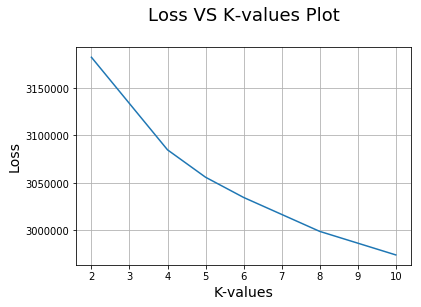

In [69]:
# Draw Loss VS K values plot
plt.plot(k_values, loss)
plt.xlabel('K-values',size=14)
plt.ylabel('Loss',size=14)
plt.title('Loss VS K-values Plot\n',size=18)
plt.grid()
plt.show()

In [70]:
from sklearn.cluster import KMeans
optimal_k = 4
# Variable that will be used in the conclusion 
tfidf_means_k = optimal_k

# Implementing K-Means++ using optimal value of K
kmeans = KMeans(n_clusters=optimal_k, n_jobs=-1).fit(X_new)

In [71]:
print(max(kmeans.labels_))

3


In [72]:
essays = project_data['clean_essays'].values

In [73]:
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []


for CurrentValue in range(kmeans.labels_.shape[0]):
    if kmeans.labels_[CurrentValue] == 0:
        cluster1.append(essays[CurrentValue])
    elif kmeans.labels_[CurrentValue] == 1:
        cluster2.append(essays[CurrentValue])
    elif kmeans.labels_[CurrentValue] == 2:
        cluster3.append(essays[CurrentValue])
    else :
        cluster4.append(essays[CurrentValue])

# Number of essays in different clusters
print("No. of essays in Cluster-1 : ",len(cluster1))
print("\nNo. of essays in Cluster-2 : ",len(cluster2))
print("\nNo. of essays in Cluster-3 : ",len(cluster3))
print("\nNo. of essays in Cluster-4 : ",len(cluster4))



No. of essays in Cluster-1 :  3255

No. of essays in Cluster-2 :  6351

No. of essays in Cluster-3 :  8393

No. of essays in Cluster-4 :  2001


### Function for word cloud

In [74]:
from nltk import download, FreqDist, WordNetLemmatizer
def Wcloud(Data):
    topWords = []
    topWordsCount = []
    freqDistribution = FreqDist(str(Data).split())
    W = [word for word in Data if word not in stopwords]
    #Identify the top 500 words 
    count = 0 
    for word, value in freqDistribution.most_common():
        if(word in W):
            topWords.append(word)
            topWordsCount.append(value)
            count = count + 1
            if(count == 500):
                break
    return freqDistribution

### Word Clouds for all clusters

In [75]:
total_clusters = ['cluster1','cluster2','cluster3','cluster4']
feq = ['feqDistribution1','feqDistribution2','feqDistribution3','feqDistribution4']
feqDistribution_all = {}
for CurrentCluster in range(len(total_clusters)):
    temp = Wcloud(eval(total_clusters[CurrentCluster]))
    feqDistribution_all[feq[CurrentCluster]]=temp
 

### Bar plot and word cloud for all clusters

<FreqDist with 15818 samples and 623849 outcomes>
feqDistribution1 [('students', 39126), ('i', 11719), ('school', 9793), ('learning', 7709), ('classroom', 7339), ('my', 6486), ('the', 5383), ('learn', 5108), ('not', 4829), ('help', 4787), ('many', 4128), ('use', 3901), ('they', 3821), ('work', 3814), ('technology', 3745), ('need', 3563), ('able', 3248), ('day', 2955), ('would', 2894), ('we', 2792)]


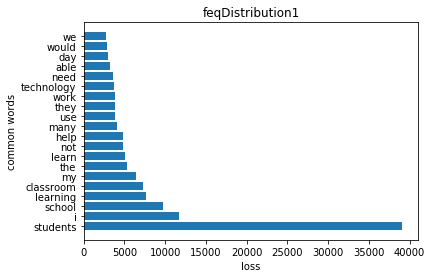

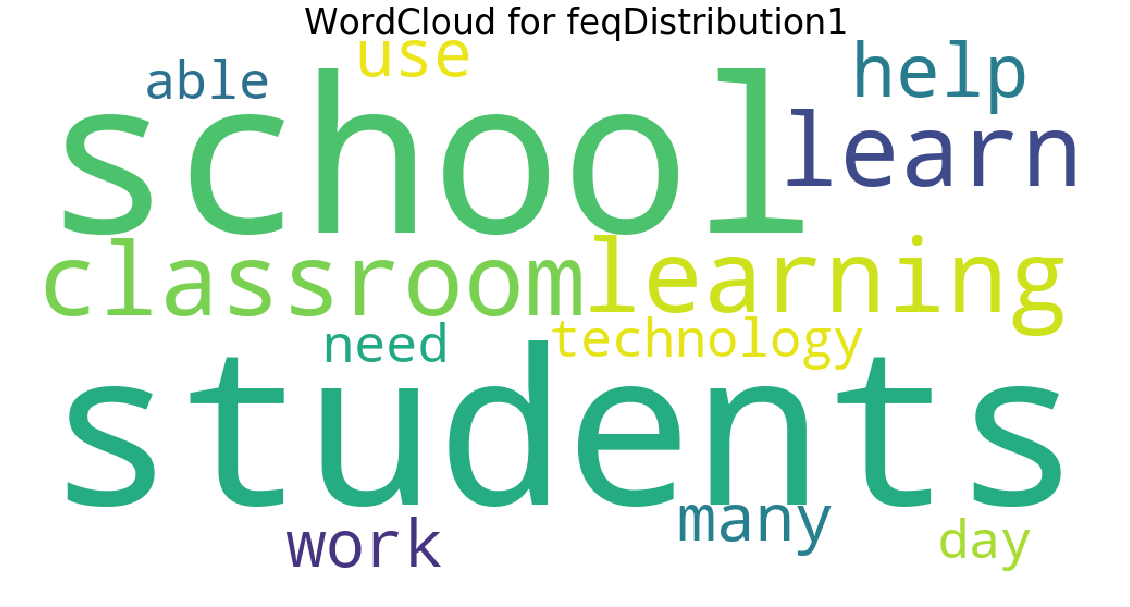

<FreqDist with 21160 samples and 853090 outcomes>
feqDistribution2 [('students', 25299), ('i', 16070), ('school', 12670), ('they', 8619), ('learning', 8553), ('classroom', 8117), ('not', 7169), ('we', 6938), ('learn', 6385), ('help', 6346), ('the', 6330), ('my', 5755), ('need', 5012), ('many', 4918), ('work', 4675), ('love', 4251), ('children', 4193), ('day', 4153), ('use', 4106), ('would', 3921)]


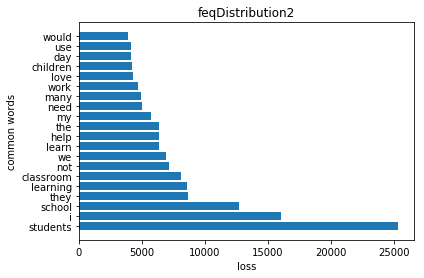

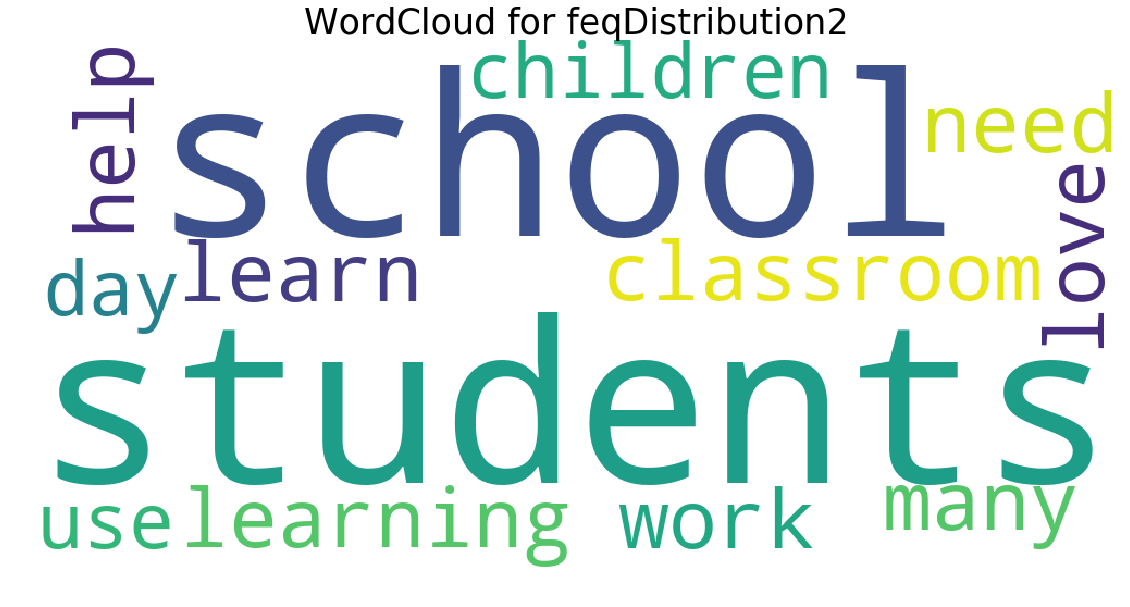

<FreqDist with 22873 samples and 1221191 outcomes>
feqDistribution3 [('students', 64759), ('i', 22488), ('school', 19690), ('learning', 13597), ('classroom', 12052), ('my', 11120), ('the', 9653), ('learn', 9511), ('not', 9221), ('they', 9030), ('help', 8942), ('many', 7885), ('work', 7129), ('need', 6872), ('use', 6530), ('we', 6385), ('able', 5747), ('come', 5603), ('day', 5451), ('technology', 5320)]


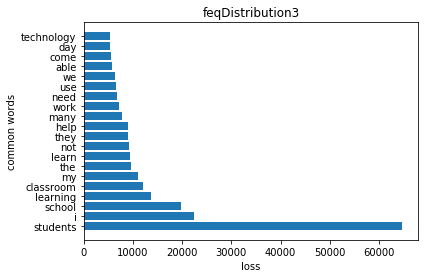

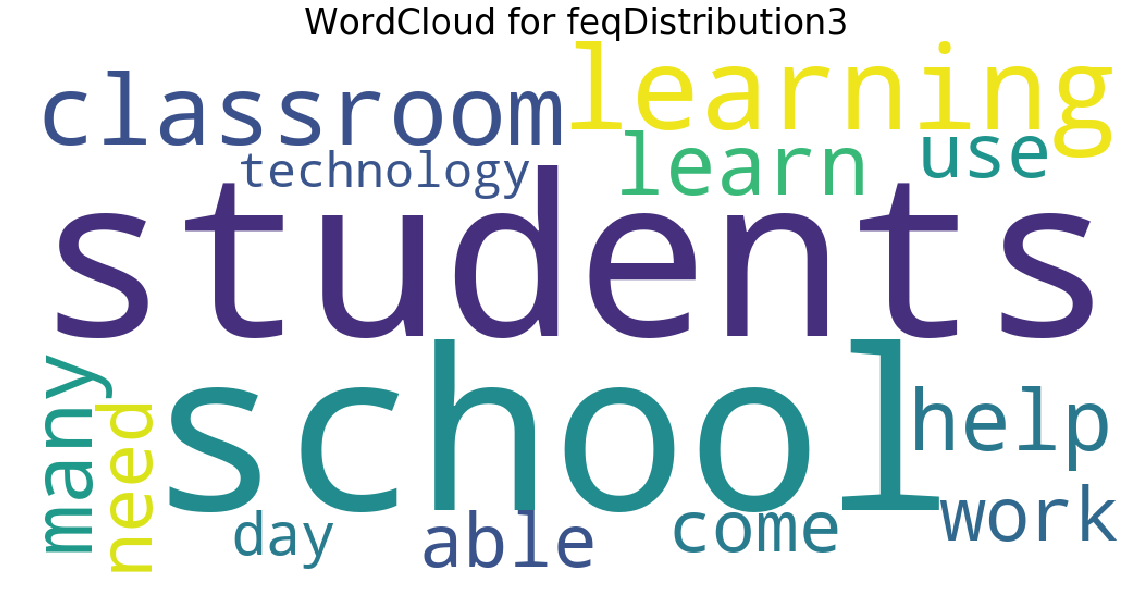

<FreqDist with 11033 samples and 305429 outcomes>
feqDistribution4 [('students', 14869), ('reading', 8218), ('books', 7219), ('i', 6790), ('read', 4545), ('school', 4261), ('classroom', 2955), ('my', 2933), ('love', 2775), ('not', 2679), ('they', 2389), ('help', 2296), ('the', 2271), ('many', 2249), ('book', 2091), ('learning', 1928), ('learn', 1851), ('library', 1665), ('grade', 1662), ('need', 1582)]


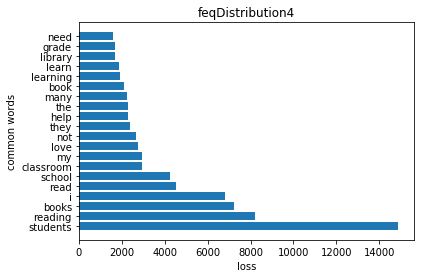

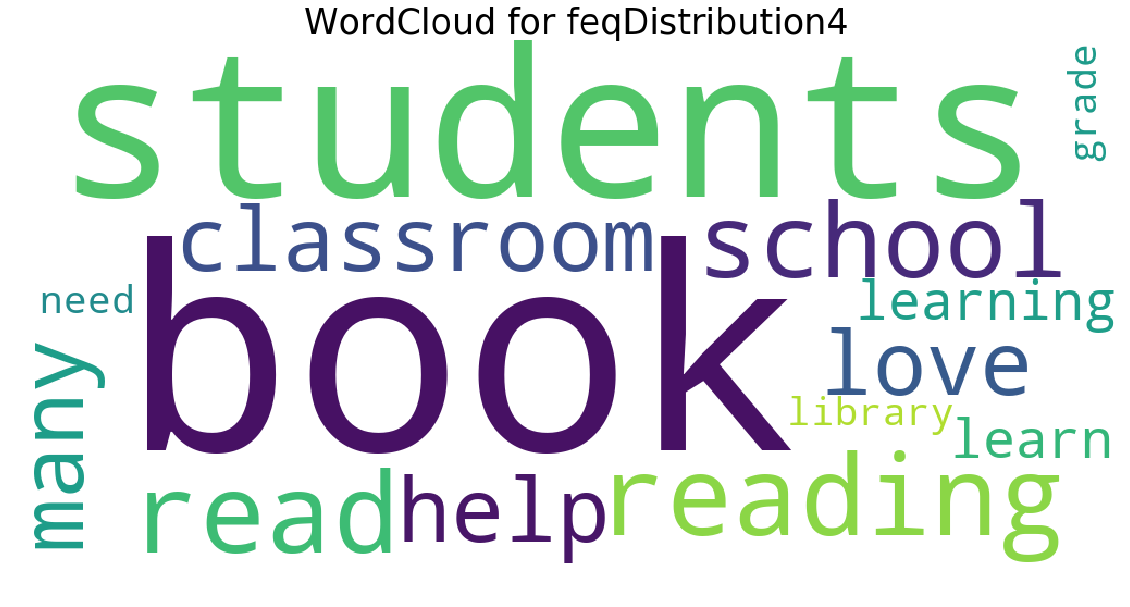

In [76]:
from wordcloud import WordCloud
for key, values in feqDistribution_all.items():
    print(values)
    mostcommon = values.most_common(20)
    print(str(key),mostcommon)
    
    print("="*100)
    #bargraph of most common words
    plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center')
    plt.yticks(range(len(mostcommon)),[val[0] for val in mostcommon])
    plt.xlabel('loss')
    plt.ylabel('common words')
    plt.title(str(key))
    plt.show()
    
    print("="*100)
    #Word CLoud
    unique_string=(" ").join(val[0] for val in mostcommon)
    wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate(unique_string)
    plt.figure(figsize=(25,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("Word_Cloud_tfidf"+".png", bbox_inches='tight')
    plt.title('WordCloud for ' + str(key), fontsize=35)
    plt.show()
    plt.close()

    print("="*100)
    
    
    

### Reading essay from the clusters

In [77]:
total_clusters = ['cluster1','cluster2','cluster3','cluster4']
for CurrentCluster in range(len(total_clusters)):
    temp = eval(total_clusters[CurrentCluster])
    print("="*100)
    print("{} essays".format(total_clusters[CurrentCluster]))
    for ele in range(3):
        print("Essay-%d : \n %s\n"%(ele+1,temp[ele]))

    

cluster1 essays
Essay-1 : 
 true champions not always ones win guts by mia hamm this quote best describes students cholla middle school approach playing sports especially girls boys soccer teams the teams made 7th 8th grade students not opportunity play organized sport due family financial difficulties i teach title one middle school urban neighborhood 74 students qualify free reduced lunch many come activity sport opportunity poor homes my students love participate sports learn new skills apart team atmosphere my school lacks funding meet students needs i concerned lack exposure not prepare participating sports teams high school by end school year goal provide students opportunity learn variety soccer skills positive qualities person actively participates team the students campus come school knowing face uphill battle comes participating organized sports the players would thrive field confidence appropriate soccer equipment play soccer best abilities the students experience helpful pe

### AGGLOMERATIVE CLUSTERING

### Hierarchial Clustering with 2 clusters

In [78]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2).fit(X_new.toarray())

In [79]:
#differntiating two differnt clusters
cluster1 = []
cluster2 = []


for CurrentCluster in tqdm(range(model.labels_.shape[0])):
    if model.labels_[CurrentCluster] == 0:
        cluster1.append(essays[CurrentCluster])
    else:
        cluster2.append(essays[CurrentCluster])

# Number of essays in different clusters
print("No. of reviews in Cluster-1 : ",len(cluster1))
print("\nNo. of reviews in Cluster-2 : ",len(cluster2))

100%|████████████████████████████████████████████████████████████████████████| 20000/20000 [00:00<00:00, 541602.35it/s]

No. of reviews in Cluster-1 :  15354

No. of reviews in Cluster-2 :  4646


### Word Clouds for all clusters

In [80]:
total_clusters = ['cluster1','cluster2']
feq = ['feqDistribution1','feqDistribution2']
feqDistribution_all = {}
for CurrentCluster in range(len(total_clusters)):
    temp = Wcloud(eval(total_clusters[CurrentCluster]))
    feqDistribution_all[feq[CurrentCluster]]=temp
 

### Bar plot and word cloud for all clusters

<FreqDist with 29636 samples and 2215585 outcomes>
feqDistribution1 [('students', 96858), ('i', 41975), ('school', 34972), ('learning', 22552), ('classroom', 20789), ('they', 18932), ('my', 18423), ('not', 18213), ('the', 16648), ('learn', 16415), ('help', 16339), ('many', 14244), ('we', 13989), ('reading', 13890), ('need', 12491), ('work', 11575), ('love', 11491), ('use', 10517), ('books', 10317), ('come', 10107)]


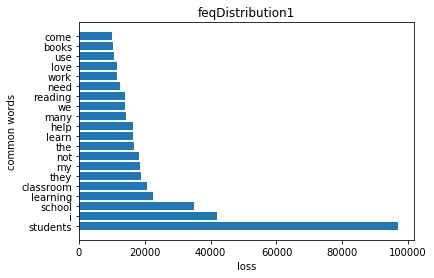

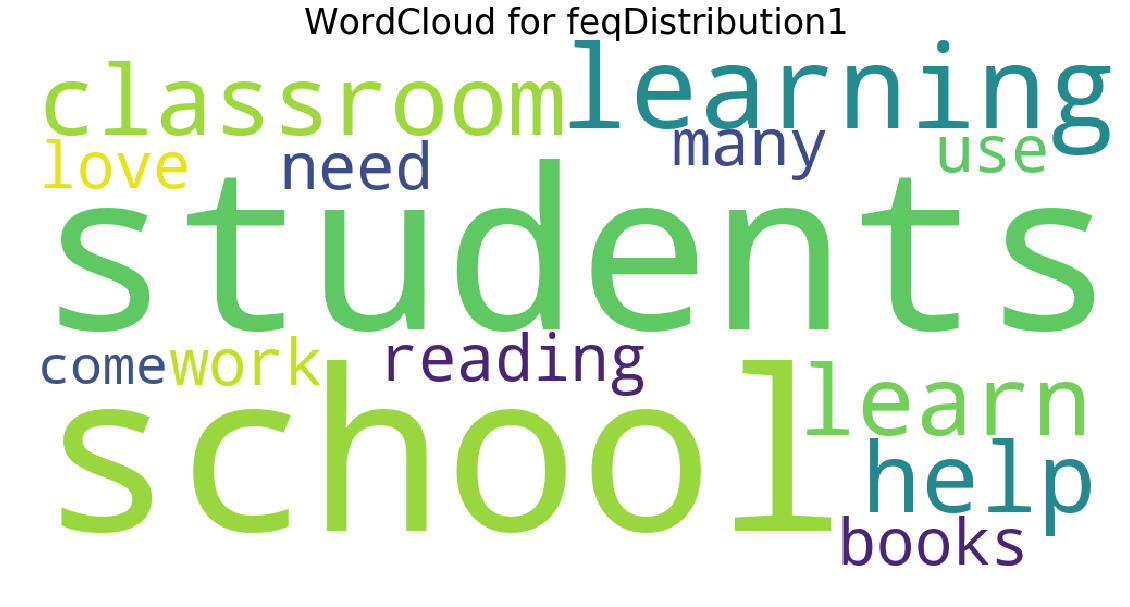

<FreqDist with 17584 samples and 787974 outcomes>
feqDistribution2 [('students', 47195), ('i', 15092), ('school', 11442), ('classroom', 9674), ('learning', 9235), ('my', 7871), ('the', 6989), ('learn', 6440), ('help', 6032), ('not', 5685), ('technology', 5151), ('work', 5071), ('many', 4936), ('they', 4927), ('use', 4894), ('need', 4538), ('able', 4261), ('math', 4031), ('day', 3729), ('we', 3641)]


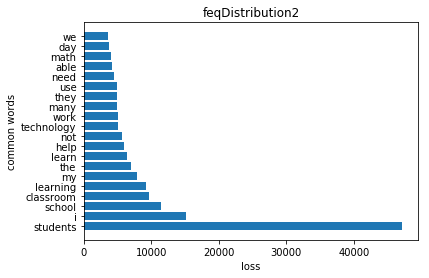

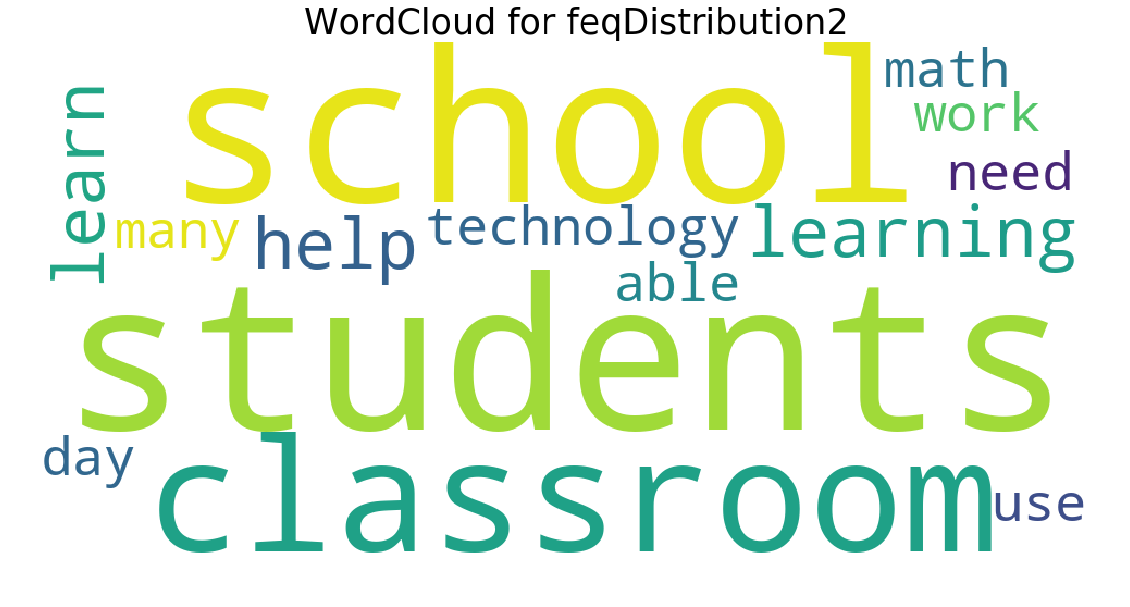

In [81]:
from wordcloud import WordCloud
for key, values in feqDistribution_all.items():
    print(values)
    mostcommon = values.most_common(20)
    print(str(key),mostcommon)
    
    print("="*100)
    #bargraph of most common words
    plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center')
    plt.yticks(range(len(mostcommon)),[val[0] for val in mostcommon])
    plt.xlabel('loss')
    plt.ylabel('common words')
    plt.title(str(key))
    plt.show()
    
    print("="*100)
    #Word CLoud
    unique_string=(" ").join(val[0] for val in mostcommon)
    wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate(unique_string)
    plt.figure(figsize=(25,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("Word_Cloud_tfidf"+".png", bbox_inches='tight')
    plt.title('WordCloud for ' + str(key), fontsize=35)
    plt.show()
    plt.close()

    print("="*100)
    
    
    

### Reading essay from the clusters

In [82]:
total_clusters = ['cluster1','cluster2']
for CurrentCluster in range(len(total_clusters)):
    temp = eval(total_clusters[CurrentCluster])
    print("="*100)
    print("{} essays".format(total_clusters[CurrentCluster]))
    for ele in range(3):
        print("Essay-%d : \n %s\n"%(ele+1,temp[ele]))

    

cluster1 essays
Essay-1 : 
 my students english learners working english second third languages we melting pot refugees immigrants native born americans bringing gift language school we 24 languages represented english learner program students every level mastery we also 40 countries represented families within school each student brings wealth knowledge experiences us open eyes new cultures beliefs respect the limits language limits world ludwig wittgenstein our english learner strong support system home begs resources many times parents learning read speak english along side children sometimes creates barriers parents able help child learn phonetics letter recognition reading skills by providing dvd players students able continue mastery english language even no one home able assist all families students within level 1 proficiency status offered part program these educational videos specially chosen english learner teacher sent home regularly watch the videos help child develop early

### Hirarchial Clustering with 5 clusters

In [83]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5).fit(X_new.toarray())

In [84]:
#differntiating two differnt clusters
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []

for CurrentCluster in tqdm(range(model.labels_.shape[0])):
    if model.labels_[CurrentCluster] == 0:
        cluster1.append(essays[CurrentCluster])
    elif model.labels_[CurrentCluster] == 1:
        cluster2.append(essays[CurrentCluster])
    elif model.labels_[CurrentCluster] == 2:
        cluster3.append(essays[CurrentCluster])
    elif model.labels_[CurrentCluster] == 3:
        cluster4.append(essays[CurrentCluster])
    else:
        cluster5.append(essays[CurrentCluster])

# Number of essays in different clusters
print("No. of essays in Cluster-1 : ",len(cluster1))
print("\nNo. of essays in Cluster-2 : ",len(cluster2))
print("\nNo. of essays in Cluster-3 : ",len(cluster3))
print("\nNo. of essays in Cluster-4 : ",len(cluster4))
print("\nNo. of essays in Cluster-5 : ",len(cluster5))


    
    

100%|████████████████████████████████████████████████████████████████████████| 20000/20000 [00:00<00:00, 270998.89it/s]

No. of essays in Cluster-1 :  2729

No. of essays in Cluster-2 :  4646

No. of essays in Cluster-3 :  2531

No. of essays in Cluster-4 :  2002

No. of essays in Cluster-5 :  8092


### Word Clouds for all clusters

In [85]:
total_clusters = ['cluster1','cluster2','cluster3','cluster4','cluster5']
feq = ['feqDistribution1','feqDistribution2','feqDistribution3','feqDistribution4','feqDistribution5']
feqDistribution_all = {}
for CurrentCluster in range(len(total_clusters)):
    temp = Wcloud(eval(total_clusters[CurrentCluster]))
    feqDistribution_all[feq[CurrentCluster]]=temp

### Bar plot and word cloud for all clusters

<FreqDist with 15594 samples and 410848 outcomes>
feqDistribution1 [('students', 17824), ('school', 10556), ('i', 6912), ('not', 3951), ('we', 3730), ('the', 2994), ('many', 2912), ('help', 2844), ('my', 2772), ('learning', 2663), ('classroom', 2643), ('learn', 2562), ('they', 2537), ('art', 2533), ('need', 2395), ('music', 2193), ('our', 2114), ('work', 2014), ('year', 2005), ('come', 1978)]


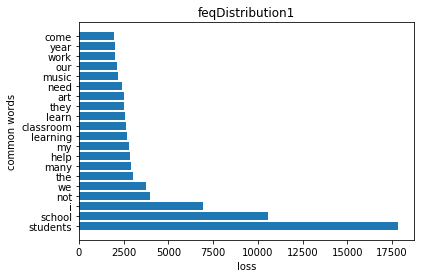

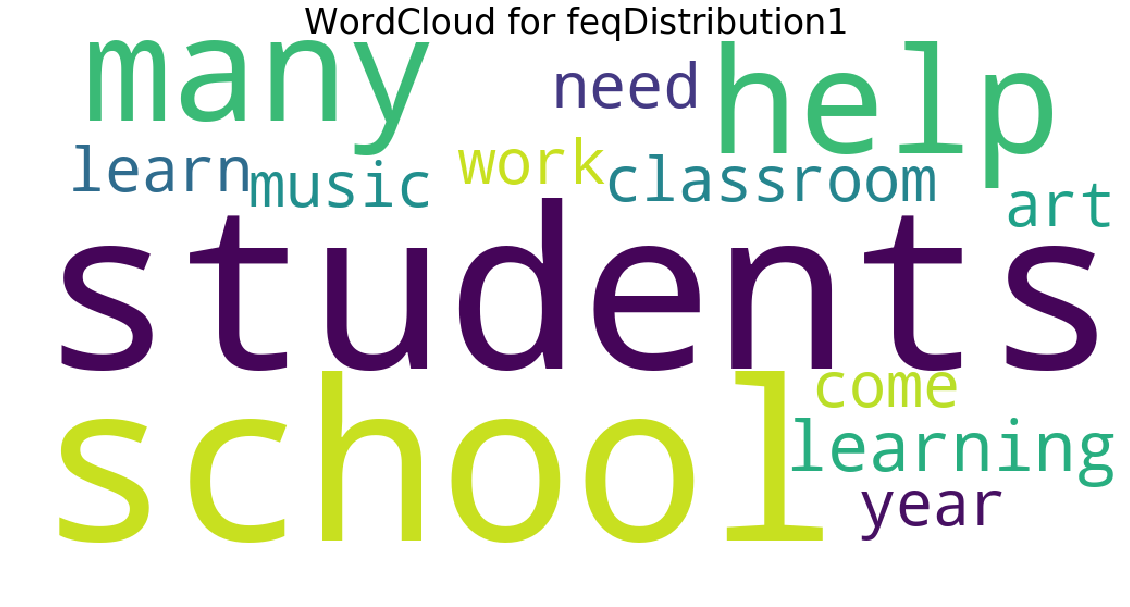

<FreqDist with 17584 samples and 787974 outcomes>
feqDistribution2 [('students', 47195), ('i', 15092), ('school', 11442), ('classroom', 9674), ('learning', 9235), ('my', 7871), ('the', 6989), ('learn', 6440), ('help', 6032), ('not', 5685), ('technology', 5151), ('work', 5071), ('many', 4936), ('they', 4927), ('use', 4894), ('need', 4538), ('able', 4261), ('math', 4031), ('day', 3729), ('we', 3641)]


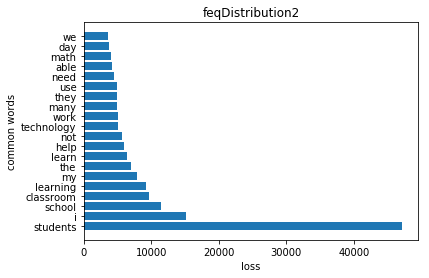

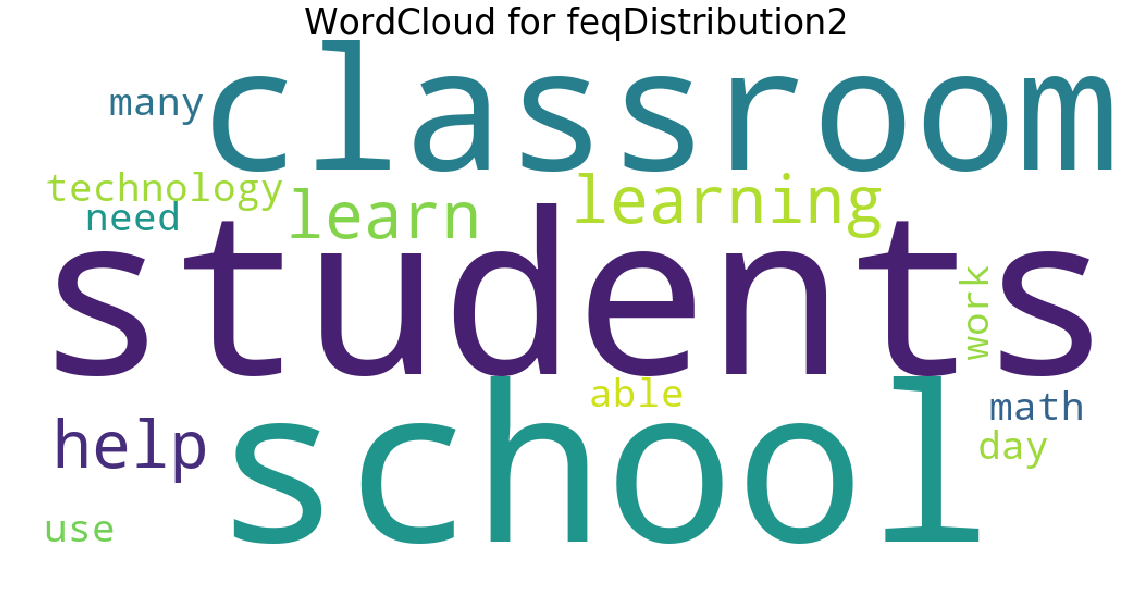

<FreqDist with 12649 samples and 384018 outcomes>
feqDistribution3 [('students', 19117), ('reading', 8541), ('i', 8287), ('books', 7325), ('school', 5427), ('read', 4760), ('classroom', 3632), ('my', 3585), ('not', 3186), ('love', 3150), ('they', 2916), ('the', 2865), ('help', 2828), ('many', 2797), ('learning', 2686), ('learn', 2470), ('book', 2248), ('grade', 2041), ('library', 2009), ('need', 2001)]


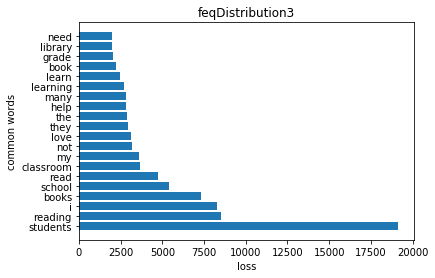

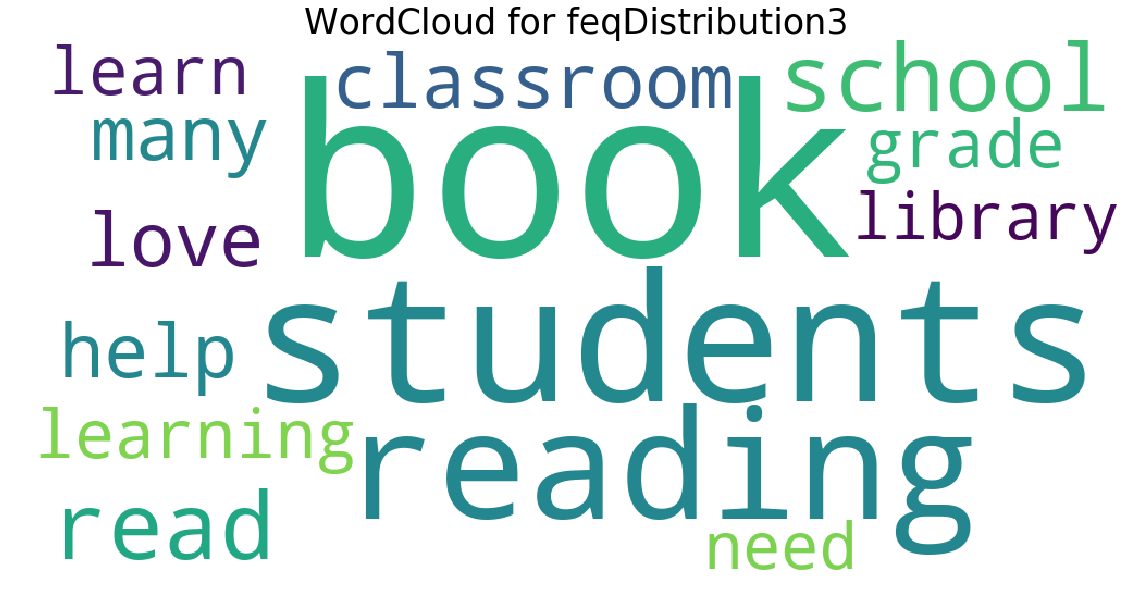

<FreqDist with 13060 samples and 266035 outcomes>
feqDistribution4 [('students', 7124), ('i', 5373), ('school', 3516), ('they', 2642), ('learning', 2600), ('classroom', 2309), ('not', 2245), ('children', 2194), ('the', 2133), ('learn', 2016), ('help', 1986), ('my', 1801), ('we', 1749), ('many', 1601), ('need', 1531), ('reading', 1505), ('work', 1457), ('love', 1438), ('come', 1279), ('year', 1212)]


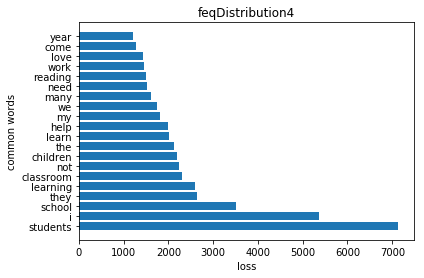

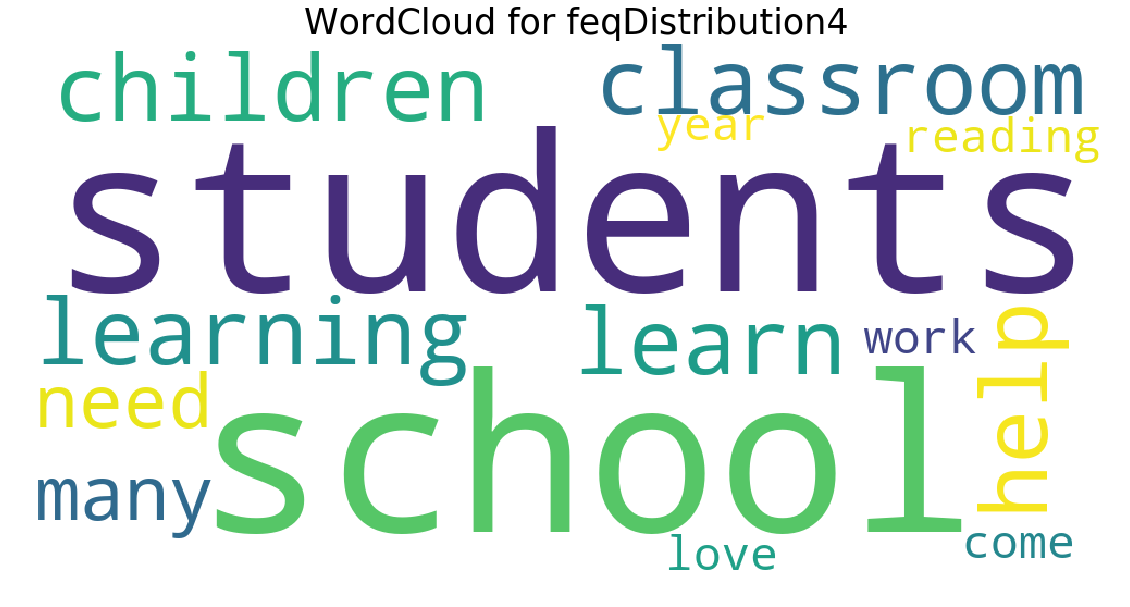

<FreqDist with 22103 samples and 1154684 outcomes>
feqDistribution5 [('students', 52793), ('i', 21403), ('school', 15473), ('learning', 14603), ('classroom', 12205), ('they', 10837), ('my', 10265), ('learn', 9367), ('not', 8831), ('help', 8681), ('the', 8656), ('many', 6934), ('we', 6747), ('work', 6658), ('use', 6577), ('need', 6564), ('day', 5694), ('able', 5369), ('love', 5347), ('would', 5283)]


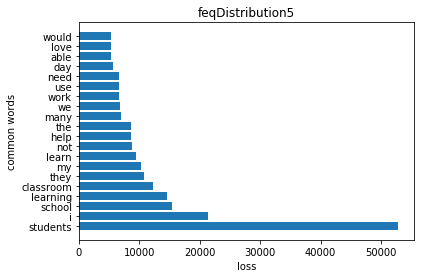

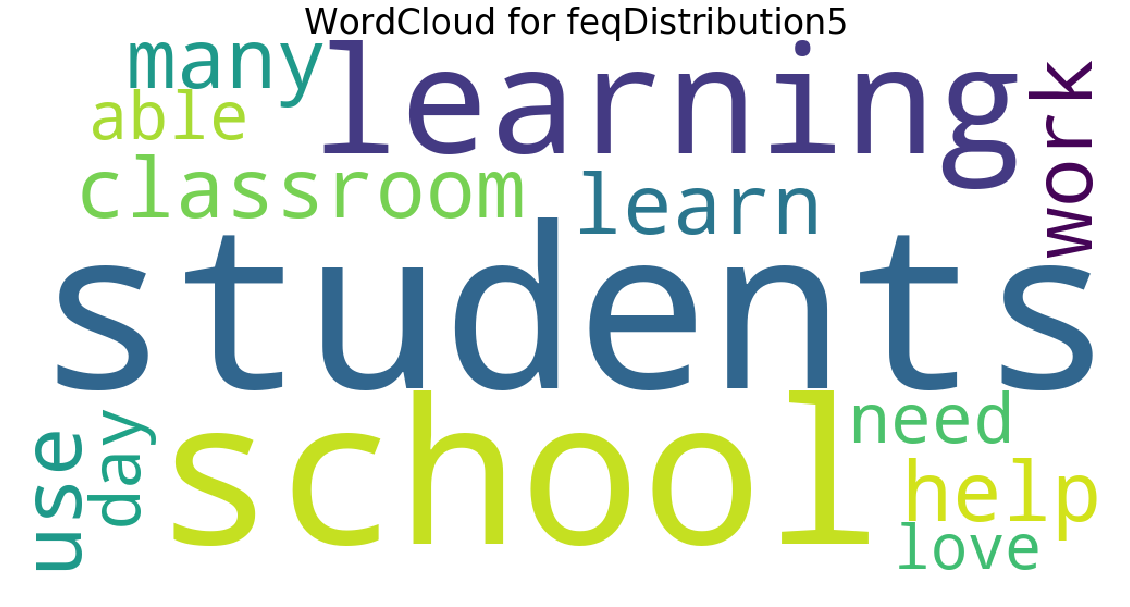

In [86]:
from wordcloud import WordCloud
for key, values in feqDistribution_all.items():
    print(values)
    mostcommon = values.most_common(20)
    print(str(key),mostcommon)
    
    print("="*100)
    #bargraph of most common words
    plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center')
    plt.yticks(range(len(mostcommon)),[val[0] for val in mostcommon])
    plt.xlabel('loss')
    plt.ylabel('common words')
    plt.title(str(key))
    plt.show()
    
    print("="*100)
    #Word CLoud
    unique_string=(" ").join(val[0] for val in mostcommon)
    wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate(unique_string)
    plt.figure(figsize=(25,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("Word_Cloud_tfidf"+".png", bbox_inches='tight')
    plt.title('WordCloud for ' + str(key), fontsize=35)
    plt.show()
    plt.close()

    print("="*100)
    

### Reading essay from the clusters

In [87]:
total_clusters = ['cluster1','cluster2','cluster3','cluster4','cluster5']
for CurrentCluster in range(len(total_clusters)):
    temp = eval(total_clusters[CurrentCluster])
    print("="*100)
    print("{} essays".format(total_clusters[CurrentCluster]))
    for ele in range(3):
        print("Essay-%d : \n %s\n"%(ele+1,temp[ele]))

    

cluster1 essays
Essay-1 : 
 true champions not always ones win guts by mia hamm this quote best describes students cholla middle school approach playing sports especially girls boys soccer teams the teams made 7th 8th grade students not opportunity play organized sport due family financial difficulties i teach title one middle school urban neighborhood 74 students qualify free reduced lunch many come activity sport opportunity poor homes my students love participate sports learn new skills apart team atmosphere my school lacks funding meet students needs i concerned lack exposure not prepare participating sports teams high school by end school year goal provide students opportunity learn variety soccer skills positive qualities person actively participates team the students campus come school knowing face uphill battle comes participating organized sports the players would thrive field confidence appropriate soccer equipment play soccer best abilities the students experience helpful pe

### Hirarchial Clustering with 10 clusters

In [88]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=10).fit(X_new.toarray())

In [89]:
#differntiating two differnt clusters
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []
cluster7 = []
cluster8 = []
cluster9 = []
cluster10 = []

for CurrentCluster in tqdm(range(model.labels_.shape[0])):
    if model.labels_[CurrentCluster] == 0:
        cluster1.append(essays[CurrentCluster])
    elif model.labels_[CurrentCluster] == 1:
        cluster2.append(essays[CurrentCluster])
    elif model.labels_[CurrentCluster] == 2:
        cluster3.append(essays[CurrentCluster])
    elif model.labels_[CurrentCluster] == 3:
        cluster4.append(essays[CurrentCluster])
    elif model.labels_[CurrentCluster] == 4:
        cluster5.append(essays[CurrentCluster])
    elif model.labels_[CurrentCluster] == 5:
        cluster6.append(essays[CurrentCluster])
    elif model.labels_[CurrentCluster] == 6:
        cluster7.append(essays[CurrentCluster])
    elif model.labels_[CurrentCluster] == 7:
        cluster8.append(essays[CurrentCluster])
    elif model.labels_[CurrentCluster] == 8:
        cluster9.append(essays[CurrentCluster])
    else:
        cluster10.append(essays[CurrentCluster])

# Number of essays in different clusters
print("  No. of essays in Cluster-1 : ",len(cluster1))
print("\nNo. of essays in Cluster-2 : ",len(cluster2))
print("\nNo. of essays in Cluster-3 : ",len(cluster3))
print("\nNo. of essays in Cluster-4 : ",len(cluster4))
print("\nNo. of essays in Cluster-5 : ",len(cluster5)) 
print("\nNo. of essays in Cluster-6 : ",len(cluster6))
print("\nNo. of essays in Cluster-7 : ",len(cluster7))
print("\nNo. of essays in Cluster-8 : ",len(cluster8))
print("\nNo. of essays in Cluster-9 : ",len(cluster9))
print("\nNo. of essays in Cluster-10 : ",len(cluster10))

    
    

100%|████████████████████████████████████████████████████████████████████████| 20000/20000 [00:00<00:00, 278524.74it/s]

  No. of essays in Cluster-1 :  1302

No. of essays in Cluster-2 :  2632

No. of essays in Cluster-3 :  2531

No. of essays in Cluster-4 :  1952

No. of essays in Cluster-5 :  8092

No. of essays in Cluster-6 :  381

No. of essays in Cluster-7 :  2001

No. of essays in Cluster-8 :  396

No. of essays in Cluster-9 :  712

No. of essays in Cluster-10 :  1


### Word Clouds for all clusters

In [90]:
total_clusters = ['cluster1','cluster2','cluster3','cluster4','cluster5',
                  'cluster6','cluster7','cluster8','cluster9','cluster10']
feq = ['feqDistribution1','feqDistribution2','feqDistribution3','feqDistribution4','feqDistribution5',
       'feqDistribution6','feqDistribution7','feqDistribution8','feqDistribution9','feqDistribution10']

feqDistribution_all = {}
for CurrentCluster in range(len(total_clusters)):
    temp = Wcloud(eval(total_clusters[CurrentCluster]))
    feqDistribution_all[feq[CurrentCluster]]=temp

### Bar plot and word cloud for all clusters

<FreqDist with 9825 samples and 237447 outcomes>
feqDistribution1 [('students', 14656), ('i', 4417), ('technology', 3826), ('school', 3274), ('classroom', 3255), ('learning', 3234), ('my', 2569), ('use', 2454), ('learn', 1831), ('not', 1828), ('the', 1724), ('help', 1717), ('many', 1587), ('they', 1475), ('able', 1425), ('skills', 1424), ('access', 1412), ('work', 1401), ('need', 1268), ('would', 1227)]


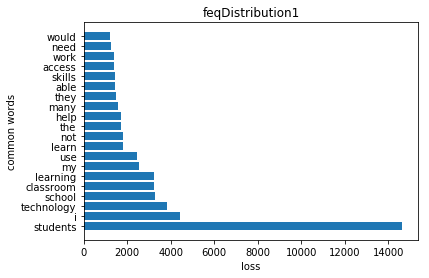

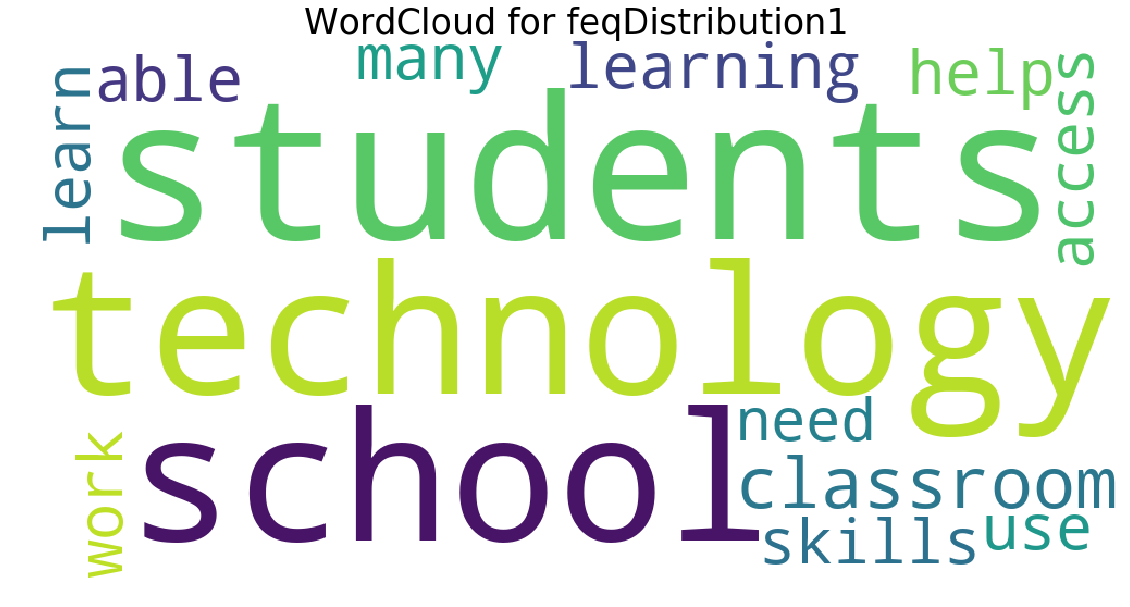

<FreqDist with 14563 samples and 428559 outcomes>
feqDistribution2 [('students', 25885), ('i', 7754), ('school', 6787), ('the', 4480), ('classroom', 4327), ('learning', 4078), ('my', 3991), ('help', 3447), ('learn', 3438), ('not', 2960), ('math', 2793), ('work', 2671), ('many', 2652), ('they', 2555), ('need', 2457), ('able', 2232), ('we', 2112), ('use', 2090), ('skills', 1998), ('come', 1916)]


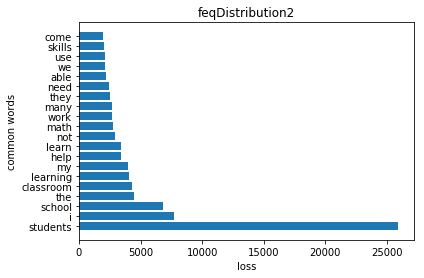

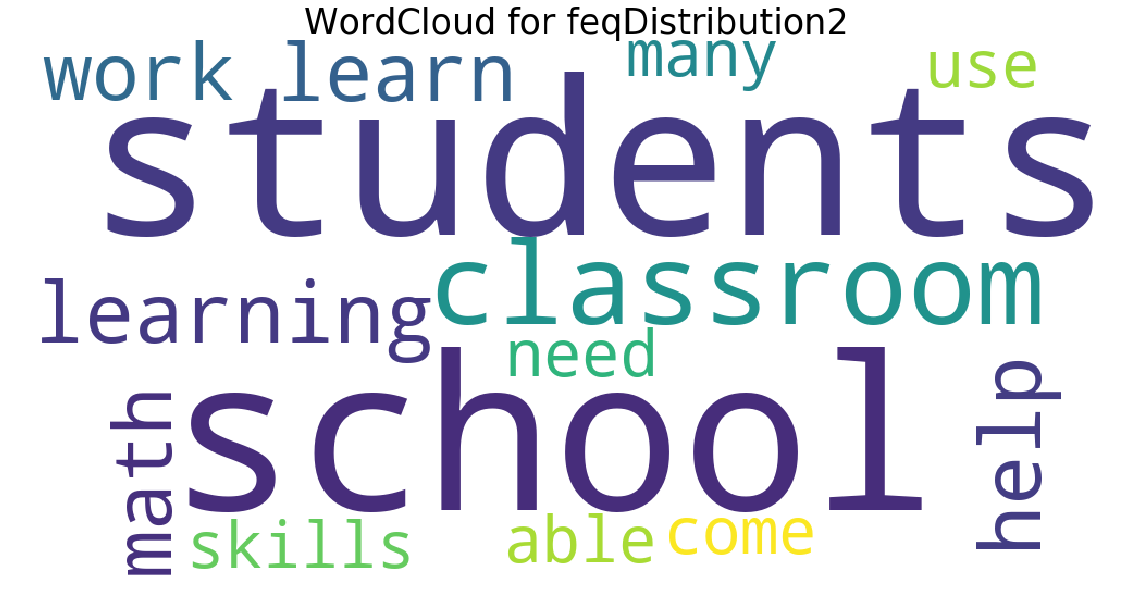

<FreqDist with 12649 samples and 384018 outcomes>
feqDistribution3 [('students', 19117), ('reading', 8541), ('i', 8287), ('books', 7325), ('school', 5427), ('read', 4760), ('classroom', 3632), ('my', 3585), ('not', 3186), ('love', 3150), ('they', 2916), ('the', 2865), ('help', 2828), ('many', 2797), ('learning', 2686), ('learn', 2470), ('book', 2248), ('grade', 2041), ('library', 2009), ('need', 2001)]


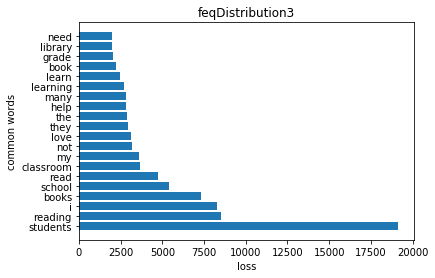

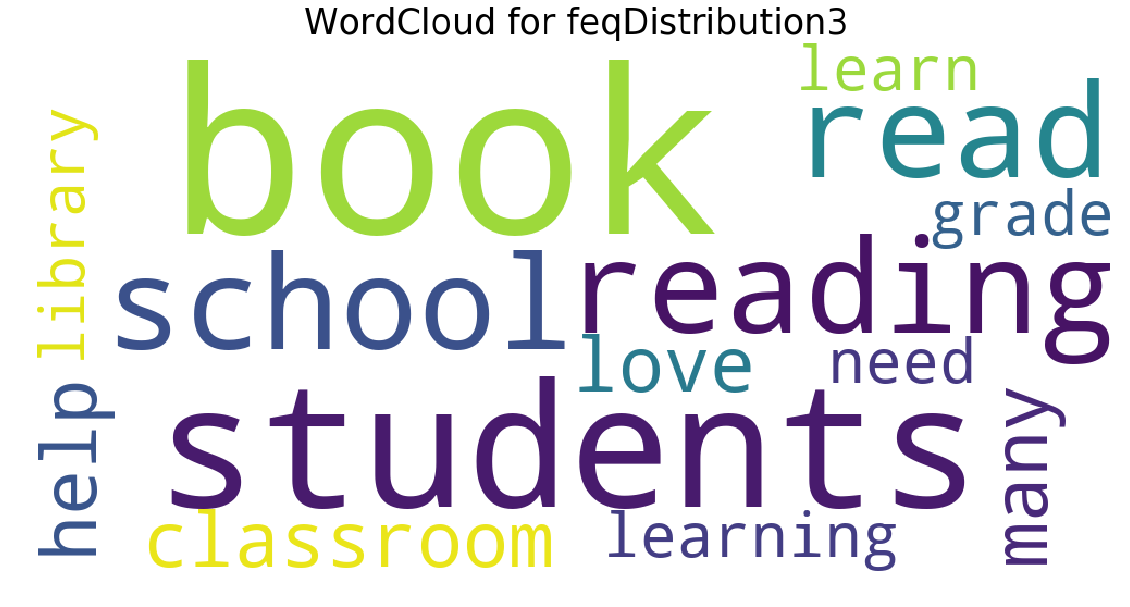

<FreqDist with 13321 samples and 291277 outcomes>
feqDistribution4 [('students', 12304), ('school', 8567), ('i', 4883), ('not', 3082), ('we', 2911), ('help', 2201), ('many', 2149), ('classroom', 2058), ('the', 2016), ('my', 1906), ('learning', 1906), ('need', 1863), ('they', 1814), ('learn', 1813), ('our', 1658), ('come', 1540), ('year', 1458), ('work', 1458), ('supplies', 1430), ('day', 1357)]


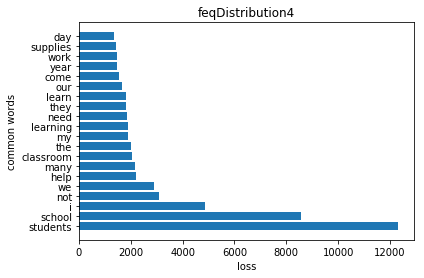

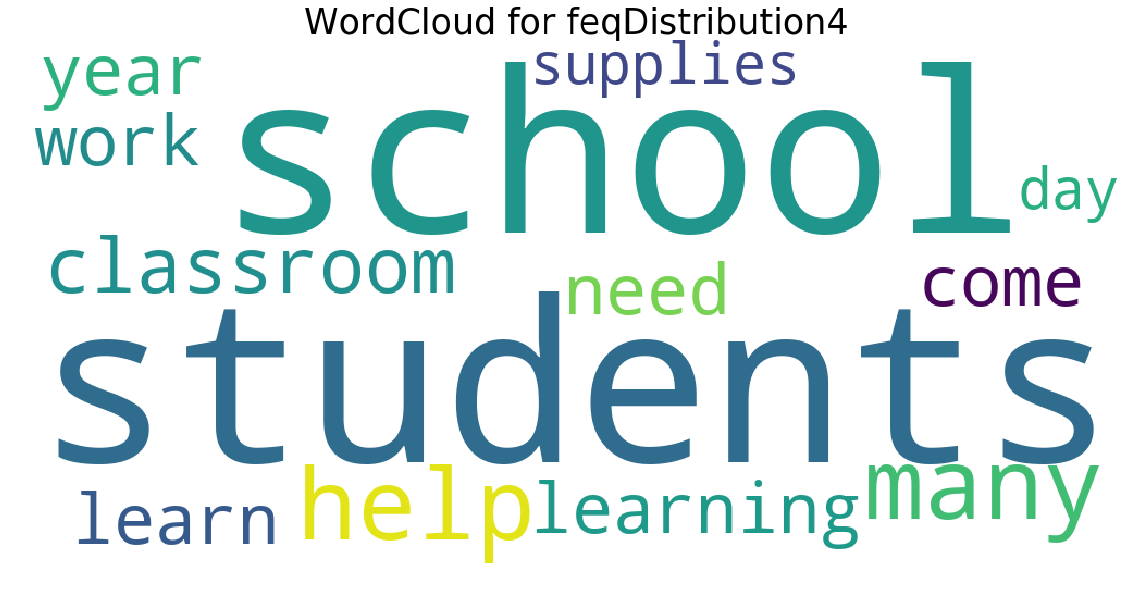

<FreqDist with 22103 samples and 1154684 outcomes>
feqDistribution5 [('students', 52793), ('i', 21403), ('school', 15473), ('learning', 14603), ('classroom', 12205), ('they', 10837), ('my', 10265), ('learn', 9367), ('not', 8831), ('help', 8681), ('the', 8656), ('many', 6934), ('we', 6747), ('work', 6658), ('use', 6577), ('need', 6564), ('day', 5694), ('able', 5369), ('love', 5347), ('would', 5283)]


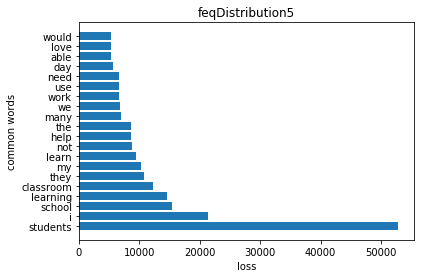

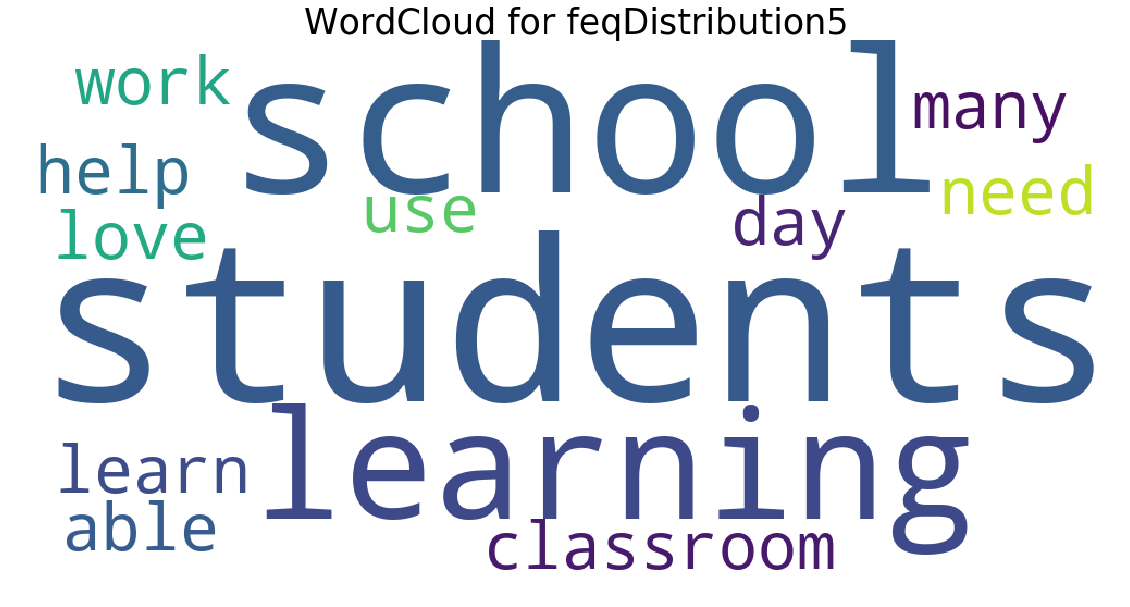

<FreqDist with 6300 samples and 60951 outcomes>
feqDistribution6 [('students', 2781), ('art', 2250), ('i', 1187), ('school', 917), ('my', 509), ('the', 491), ('create', 482), ('not', 412), ('many', 385), ('they', 378), ('we', 370), ('learning', 360), ('love', 356), ('use', 351), ('work', 349), ('class', 331), ('learn', 327), ('materials', 326), ('year', 306), ('classroom', 303)]


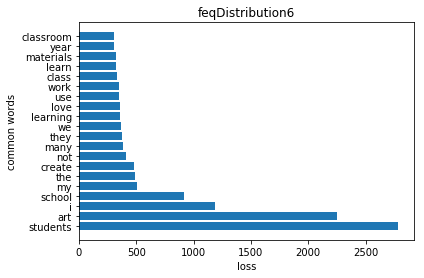

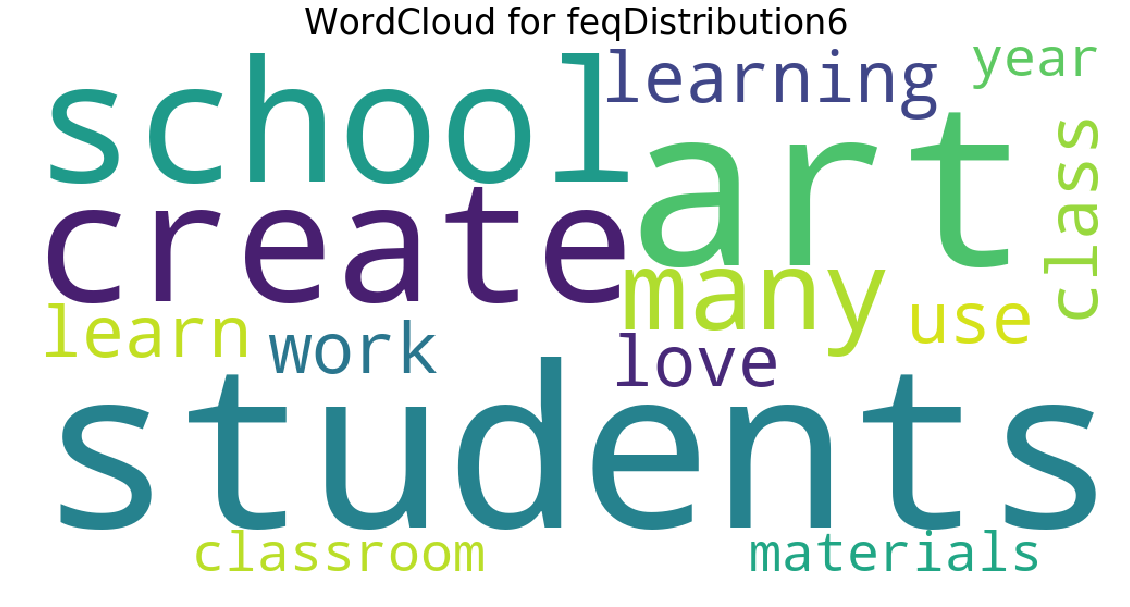

<FreqDist with 13059 samples and 265840 outcomes>
feqDistribution7 [('students', 7124), ('i', 5373), ('school', 3516), ('they', 2642), ('learning', 2600), ('classroom', 2309), ('not', 2245), ('children', 2194), ('the', 2133), ('learn', 2016), ('help', 1986), ('my', 1801), ('we', 1749), ('many', 1601), ('need', 1531), ('reading', 1505), ('work', 1457), ('love', 1438), ('come', 1279), ('year', 1212)]


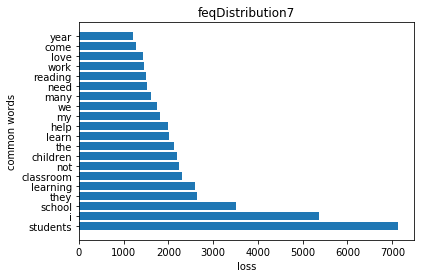

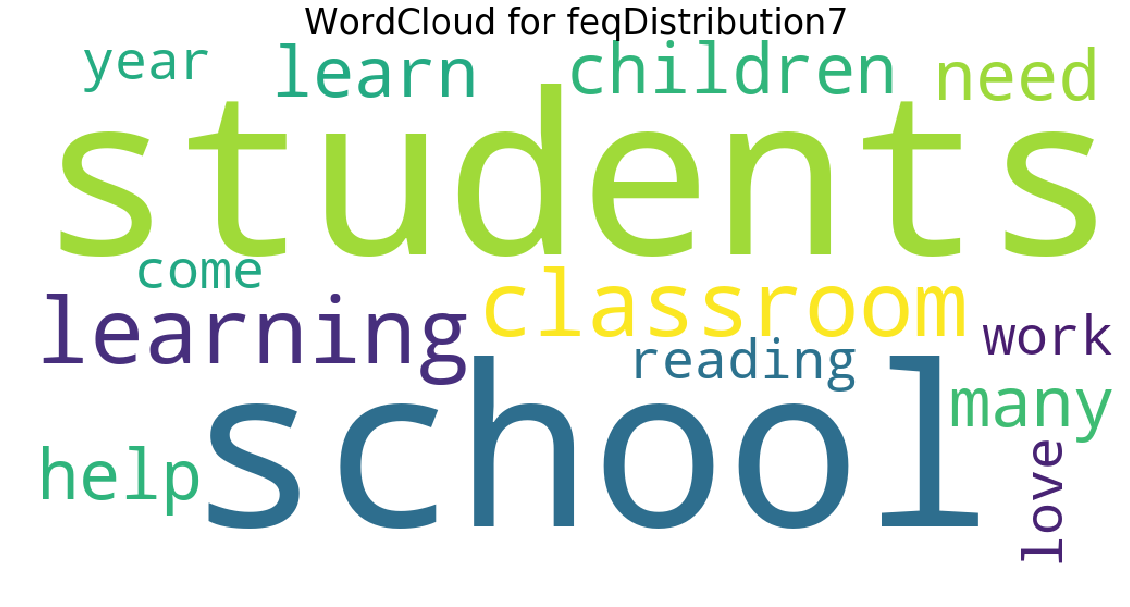

<FreqDist with 5680 samples and 58620 outcomes>
feqDistribution8 [('students', 2739), ('music', 2061), ('school', 1072), ('i', 842), ('instruments', 650), ('the', 487), ('not', 457), ('we', 449), ('band', 447), ('learn', 422), ('play', 422), ('learning', 397), ('many', 378), ('my', 357), ('help', 346), ('they', 345), ('class', 331), ('instrument', 295), ('program', 290), ('classroom', 282)]


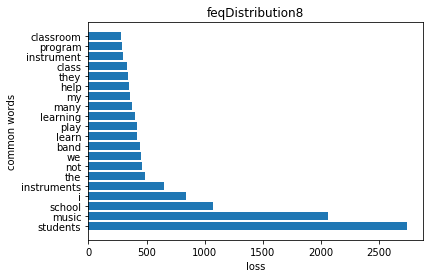

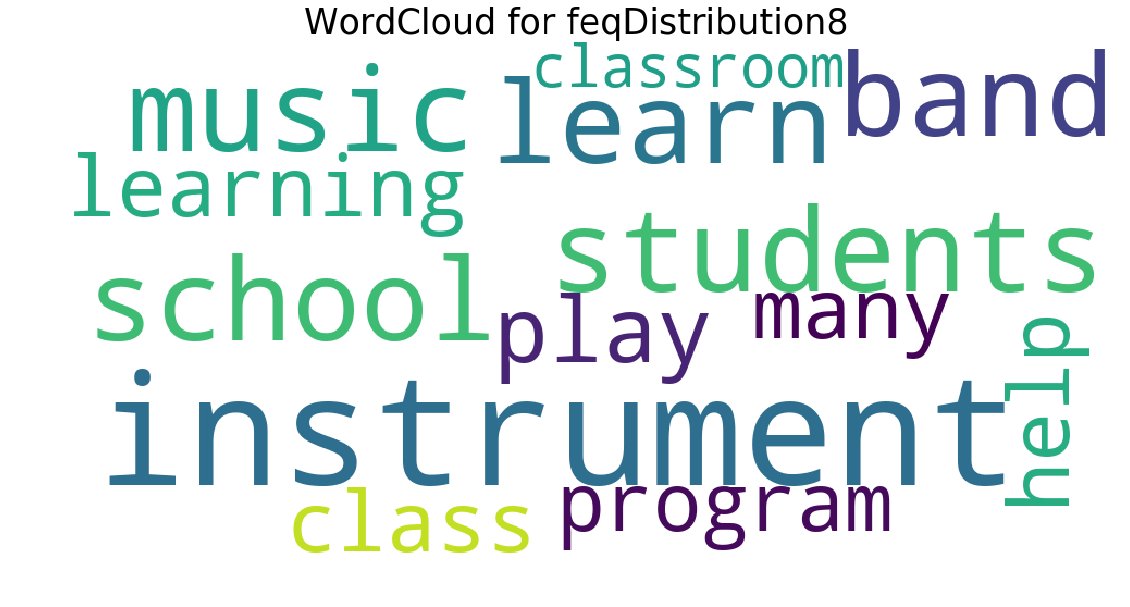

<FreqDist with 6315 samples and 121968 outcomes>
feqDistribution9 [('students', 6654), ('i', 2921), ('classroom', 2092), ('learning', 1923), ('seating', 1520), ('school', 1381), ('my', 1311), ('learn', 1171), ('day', 1056), ('move', 1035), ('work', 999), ('they', 897), ('not', 897), ('help', 868), ('need', 813), ('the', 785), ('flexible', 729), ('best', 709), ('many', 697), ('would', 691)]


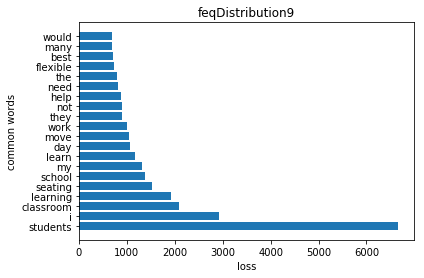

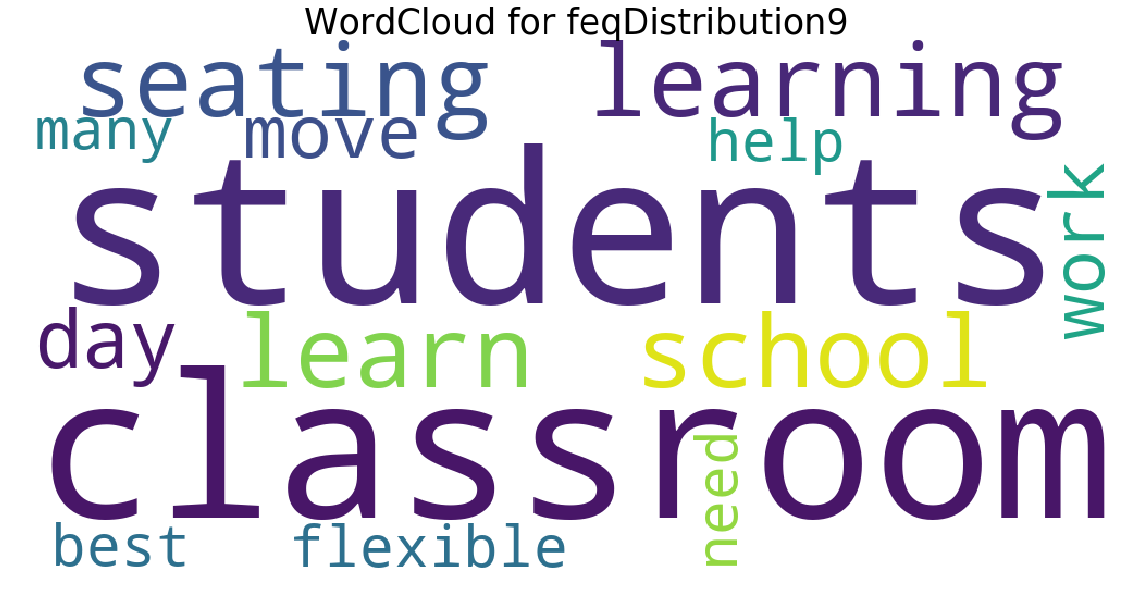

<FreqDist with 5 samples and 195 outcomes>
feqDistribution10 [('hands', 65), ('learners', 64), ('visual', 64), ("['visual", 1), ("learners']", 1)]


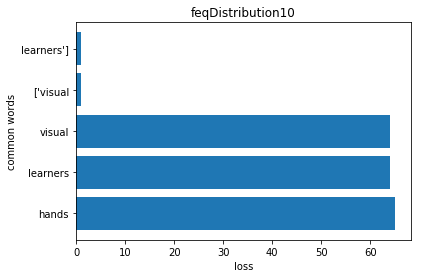

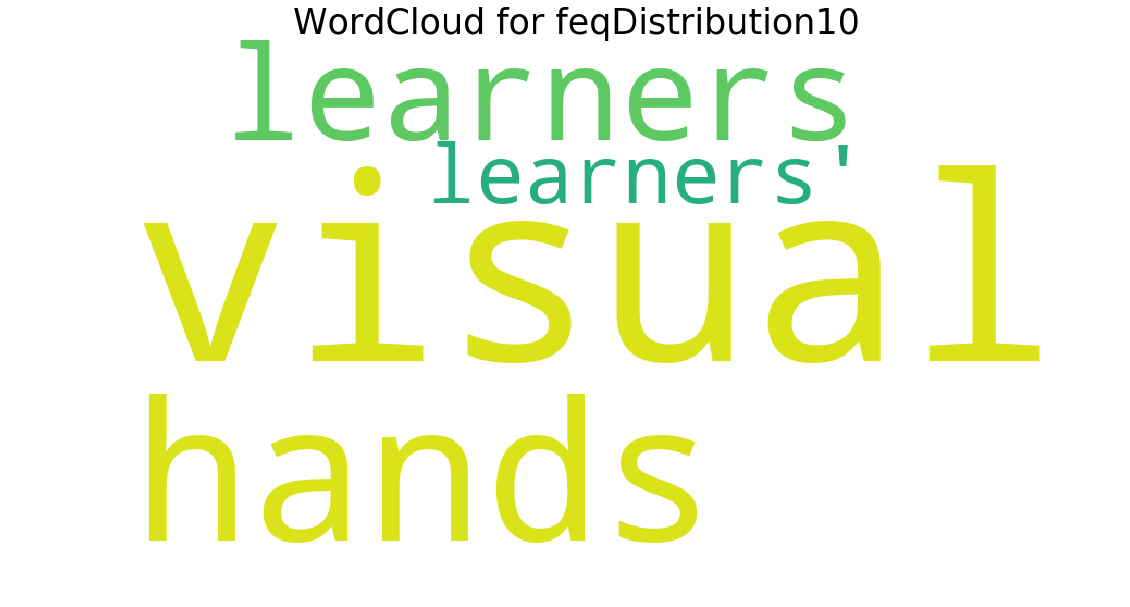

In [91]:
from wordcloud import WordCloud
for key, values in feqDistribution_all.items():
    print(values)
    mostcommon = values.most_common(20)
    print(str(key),mostcommon)
    
    print("="*100)
    #bargraph of most common words
    plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center')
    plt.yticks(range(len(mostcommon)),[val[0] for val in mostcommon])
    plt.xlabel('loss')
    plt.ylabel('common words')
    plt.title(str(key))
    plt.show()
    
    print("="*100)
    #Word CLoud
    unique_string=(" ").join(val[0] for val in mostcommon)
    wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate(unique_string)
    plt.figure(figsize=(25,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("Word_Cloud_tfidf"+".png", bbox_inches='tight')
    plt.title('WordCloud for ' + str(key), fontsize=35)
    plt.show()
    plt.close()

    print("="*100)
    

### Reading essay from the clusters

In [96]:
total_clusters = ['cluster1','cluster2','cluster3','cluster4','cluster5',
                  'cluster6','cluster7','cluster8','cluster9','cluster10']
for CurrentCluster in range(len(total_clusters)):
    temp = eval(total_clusters[CurrentCluster])
    print("="*100)
    print("{} essays".format(total_clusters[CurrentCluster]))
    if CurrentCluster == 9:
        print("Essay-%d : \n %s\n"%(CurrentCluster+1,temp))
    else:
        for ele in range(3):
            print("Essay-%d : \n %s\n"%(ele+1,temp[ele]))

    

cluster1 essays
Essay-1 : 
 i moving 2nd grade 3rd grade beginning next school year i takings current students move i teach inclusion classroom includes students adhd sld well autistic students my students work hard achieving goals no matter struggles may the school i teach houses great deal autistic students well ell students my student love read work challenge they also love move around they work better able move room different areas rather usual set these flexible seating options allow students different seating options instead sitting traditional desk chair able use flexible seating tools reduce stress anxiety these tools beneficial students special needs also students it proven fact students moving oxygen going brain means learning taking place these flexible seating options allow students move traditional seat allows reduce stress classroom this project significantly help students reduce stress anxiety standardized testing the students 3rd grade required take state mandated test 

### DBSCAN

### finding the nth nearest neighbour

In [97]:
# function to determine the distance of nth-nearest neighbour to all points in a multi-dimensional array
def n_neighbour(vectors , n):
    distance = []
    for point in vectors:
        temp = np.sort(np.sum((vectors-point)**2,axis=1),axis=None)
        distance.append(temp[n])
    return np.sqrt(np.array(distance))

### funtion for DBSCAN

In [98]:
# Function definition for implementing DBSCAN
def dbscan(epsilon, samples, Data):
    from sklearn.cluster import DBSCAN
    db = DBSCAN(eps=epsilon, min_samples=samples, n_jobs=-1).fit(Data)
    
    # Number of clusters in labels, ignoring noise(-1) if present.
    n_clusters = len(set(db.labels_))
    print("Number of clusters for MinPts = %d and Epsilon = %f is : %d "%(samples,epsilon,n_clusters))
    print("Labels(-1 is for Noise) : ",set(db.labels_))
    print()
    return db

### ELBOW Method to find right epsilon

In [99]:
from sklearn.preprocessing import StandardScaler
X_new_agg = X_new.todense()[:5000]
data = StandardScaler().fit_transform(X_new_agg)
data.shape

(5000, 5000)

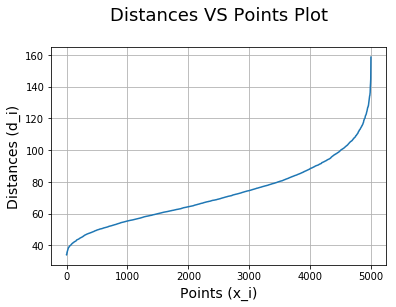

In [100]:
min_points = 8 
# (ln(5000)=8.5)
# Computing distances of nth-nearest neighbours
distances = n_neighbour(data,min_points)

sorted_distance = np.sort(distances)
points = [value for value in range(X_new_agg.shape[0])]

# Draw distances(d_i) VS points(x_i) plot
plt.plot(points, sorted_distance)
plt.xlabel('Points (x_i)',size=14)
plt.ylabel('Distances (d_i)',size=14)
plt.title('Distances VS Points Plot\n',size=18)
plt.grid()
plt.show()

In [101]:
optimal_eps = 110
# Clustering with right epsilon
db1 = dbscan(optimal_eps, min_points, data)

Number of clusters for MinPts = 8 and Epsilon = 110.000000 is : 2 
Labels(-1 is for Noise) :  {0, -1}



### Creating clusters for DBSCAN

In [102]:
#differntiating two differnt clusters
cluster1 = []
cluster2 = []


for CurrentCluster in tqdm(range(db1.labels_.shape[0])):
    if model.labels_[CurrentCluster] == 0:
        cluster1.append(essays[CurrentCluster])
    else:
        cluster2.append(essays[CurrentCluster])

# Number of essays in different clusters
print("No. of essays in Cluster-1 : ",len(cluster1))
print("\nNo. of essays in Cluster-2 : ",len(cluster2))

100%|██████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 359249.01it/s]

No. of essays in Cluster-1 :  334

No. of essays in Cluster-2 :  4666


### Word Clouds for all clusters

In [103]:
total_clusters = ['cluster1','cluster2']
feq = ['feqDistribution1','feqDistribution2']
feqDistribution_all = {}
for CurrentCluster in range(len(total_clusters)):
    temp = Wcloud(eval(total_clusters[CurrentCluster]))
    feqDistribution_all[feq[CurrentCluster]]=temp
 

### Bar plot and word cloud for all clusters

<FreqDist with 5487 samples and 60319 outcomes>
feqDistribution1 [('students', 3695), ('i', 1128), ('technology', 1006), ('classroom', 860), ('school', 830), ('learning', 825), ('use', 642), ('my', 621), ('learn', 474), ('not', 464), ('the', 440), ('help', 410), ('many', 393), ('access', 369), ('they', 367), ('skills', 350), ('need', 323), ('would', 315), ('work', 308), ('able', 308)]


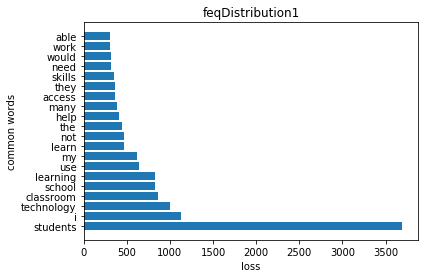

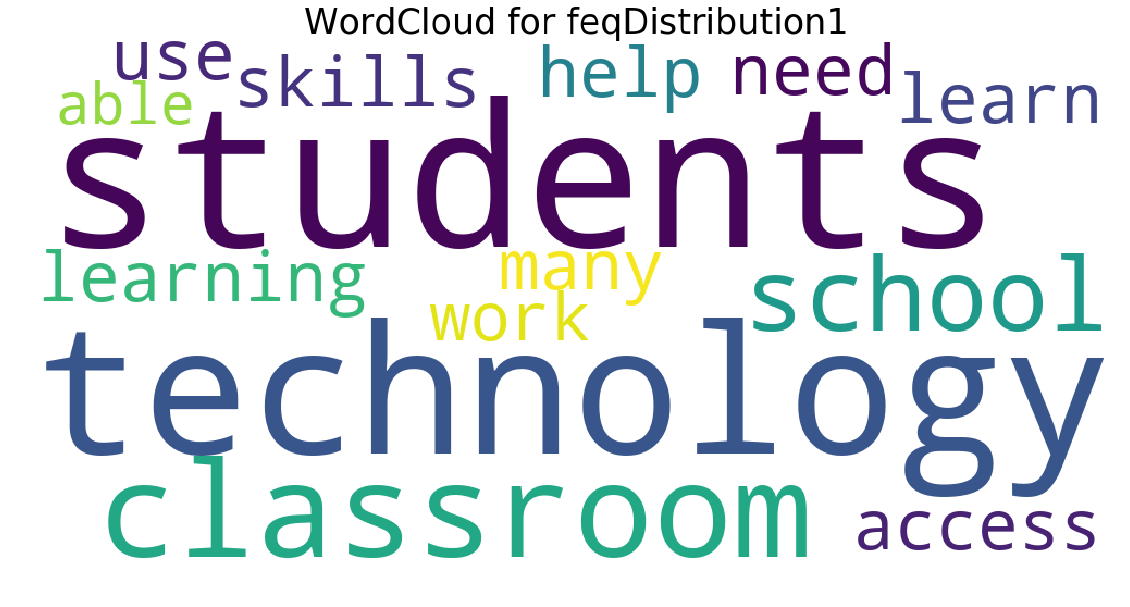

<FreqDist with 18613 samples and 695125 outcomes>
feqDistribution2 [('students', 32431), ('i', 12993), ('school', 11005), ('learning', 7156), ('classroom', 6865), ('my', 5895), ('they', 5647), ('the', 5579), ('not', 5443), ('learn', 5151), ('help', 5109), ('many', 4457), ('we', 4245), ('need', 3921), ('reading', 3804), ('work', 3803), ('love', 3342), ('day', 3280), ('use', 3230), ('come', 3130)]


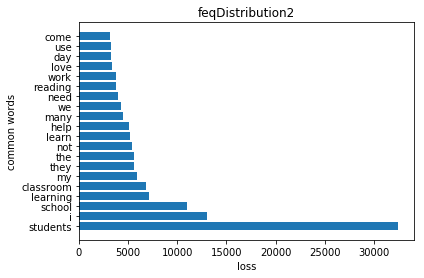

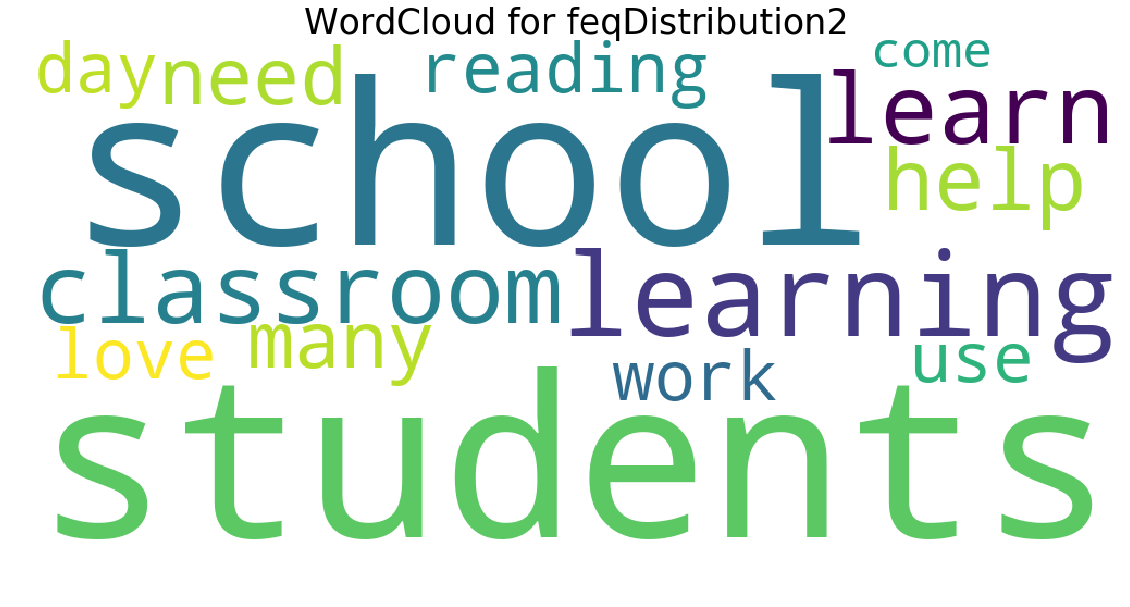

In [104]:
from wordcloud import WordCloud
for key, values in feqDistribution_all.items():
    print(values)
    mostcommon = values.most_common(20)
    print(str(key),mostcommon)
    
    print("="*100)
    #bargraph of most common words
    plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center')
    plt.yticks(range(len(mostcommon)),[val[0] for val in mostcommon])
    plt.xlabel('loss')
    plt.ylabel('common words')
    plt.title(str(key))
    plt.show()
    
    print("="*100)
    #Word CLoud
    unique_string=(" ").join(val[0] for val in mostcommon)
    wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate(unique_string)
    plt.figure(figsize=(25,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("Word_Cloud_tfidf"+".png", bbox_inches='tight')
    plt.title('WordCloud for ' + str(key), fontsize=35)
    plt.show()
    plt.close()

    print("="*100)
    
    
    

### Reading essay from the clusters

In [105]:
total_clusters = ['cluster1','cluster2']
for CurrentCluster in range(len(total_clusters)):
    temp = eval(total_clusters[CurrentCluster])
    print("="*100)
    print("{} essays".format(total_clusters[CurrentCluster]))
    for ele in range(3):
        print("Essay-%d : \n %s\n"%(ele+1,temp[ele]))

    

cluster1 essays
Essay-1 : 
 i moving 2nd grade 3rd grade beginning next school year i takings current students move i teach inclusion classroom includes students adhd sld well autistic students my students work hard achieving goals no matter struggles may the school i teach houses great deal autistic students well ell students my student love read work challenge they also love move around they work better able move room different areas rather usual set these flexible seating options allow students different seating options instead sitting traditional desk chair able use flexible seating tools reduce stress anxiety these tools beneficial students special needs also students it proven fact students moving oxygen going brain means learning taking place these flexible seating options allow students move traditional seat allows reduce stress classroom this project significantly help students reduce stress anxiety standardized testing the students 3rd grade required take state mandated test 

<h1>3. Conclusions</h1>

In [106]:
# Please compare all your models using Prettytable library

# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Vectorizer Used", "Model", "Number of clusters"]

x.add_row(["TFIDF", "KMeans Clustering(Optimal K = 4)", 4])
x.add_row(["TFIDF", "Agglomerative Clustering", "2,5,10"])
x.add_row(["TFIDF", "DBSCAN Clustering (minPts = 8, Optimal Epsilon = 100)", 2])

print(x)

+-----------------+-------------------------------------------------------+--------------------+
| Vectorizer Used |                         Model                         | Number of clusters |
+-----------------+-------------------------------------------------------+--------------------+
|      TFIDF      |            KMeans Clustering(Optimal K = 4)           |         4          |
|      TFIDF      |                Agglomerative Clustering               |       2,5,10       |
|      TFIDF      | DBSCAN Clustering (minPts = 8, Optimal Epsilon = 100) |         2          |
+-----------------+-------------------------------------------------------+--------------------+
